# Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("/content/drive/MyDrive/masters_ppg/final_df_3_stages_stand.csv")


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = df.drop(columns=['3_stages'])  # Extract features excluding the label column

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

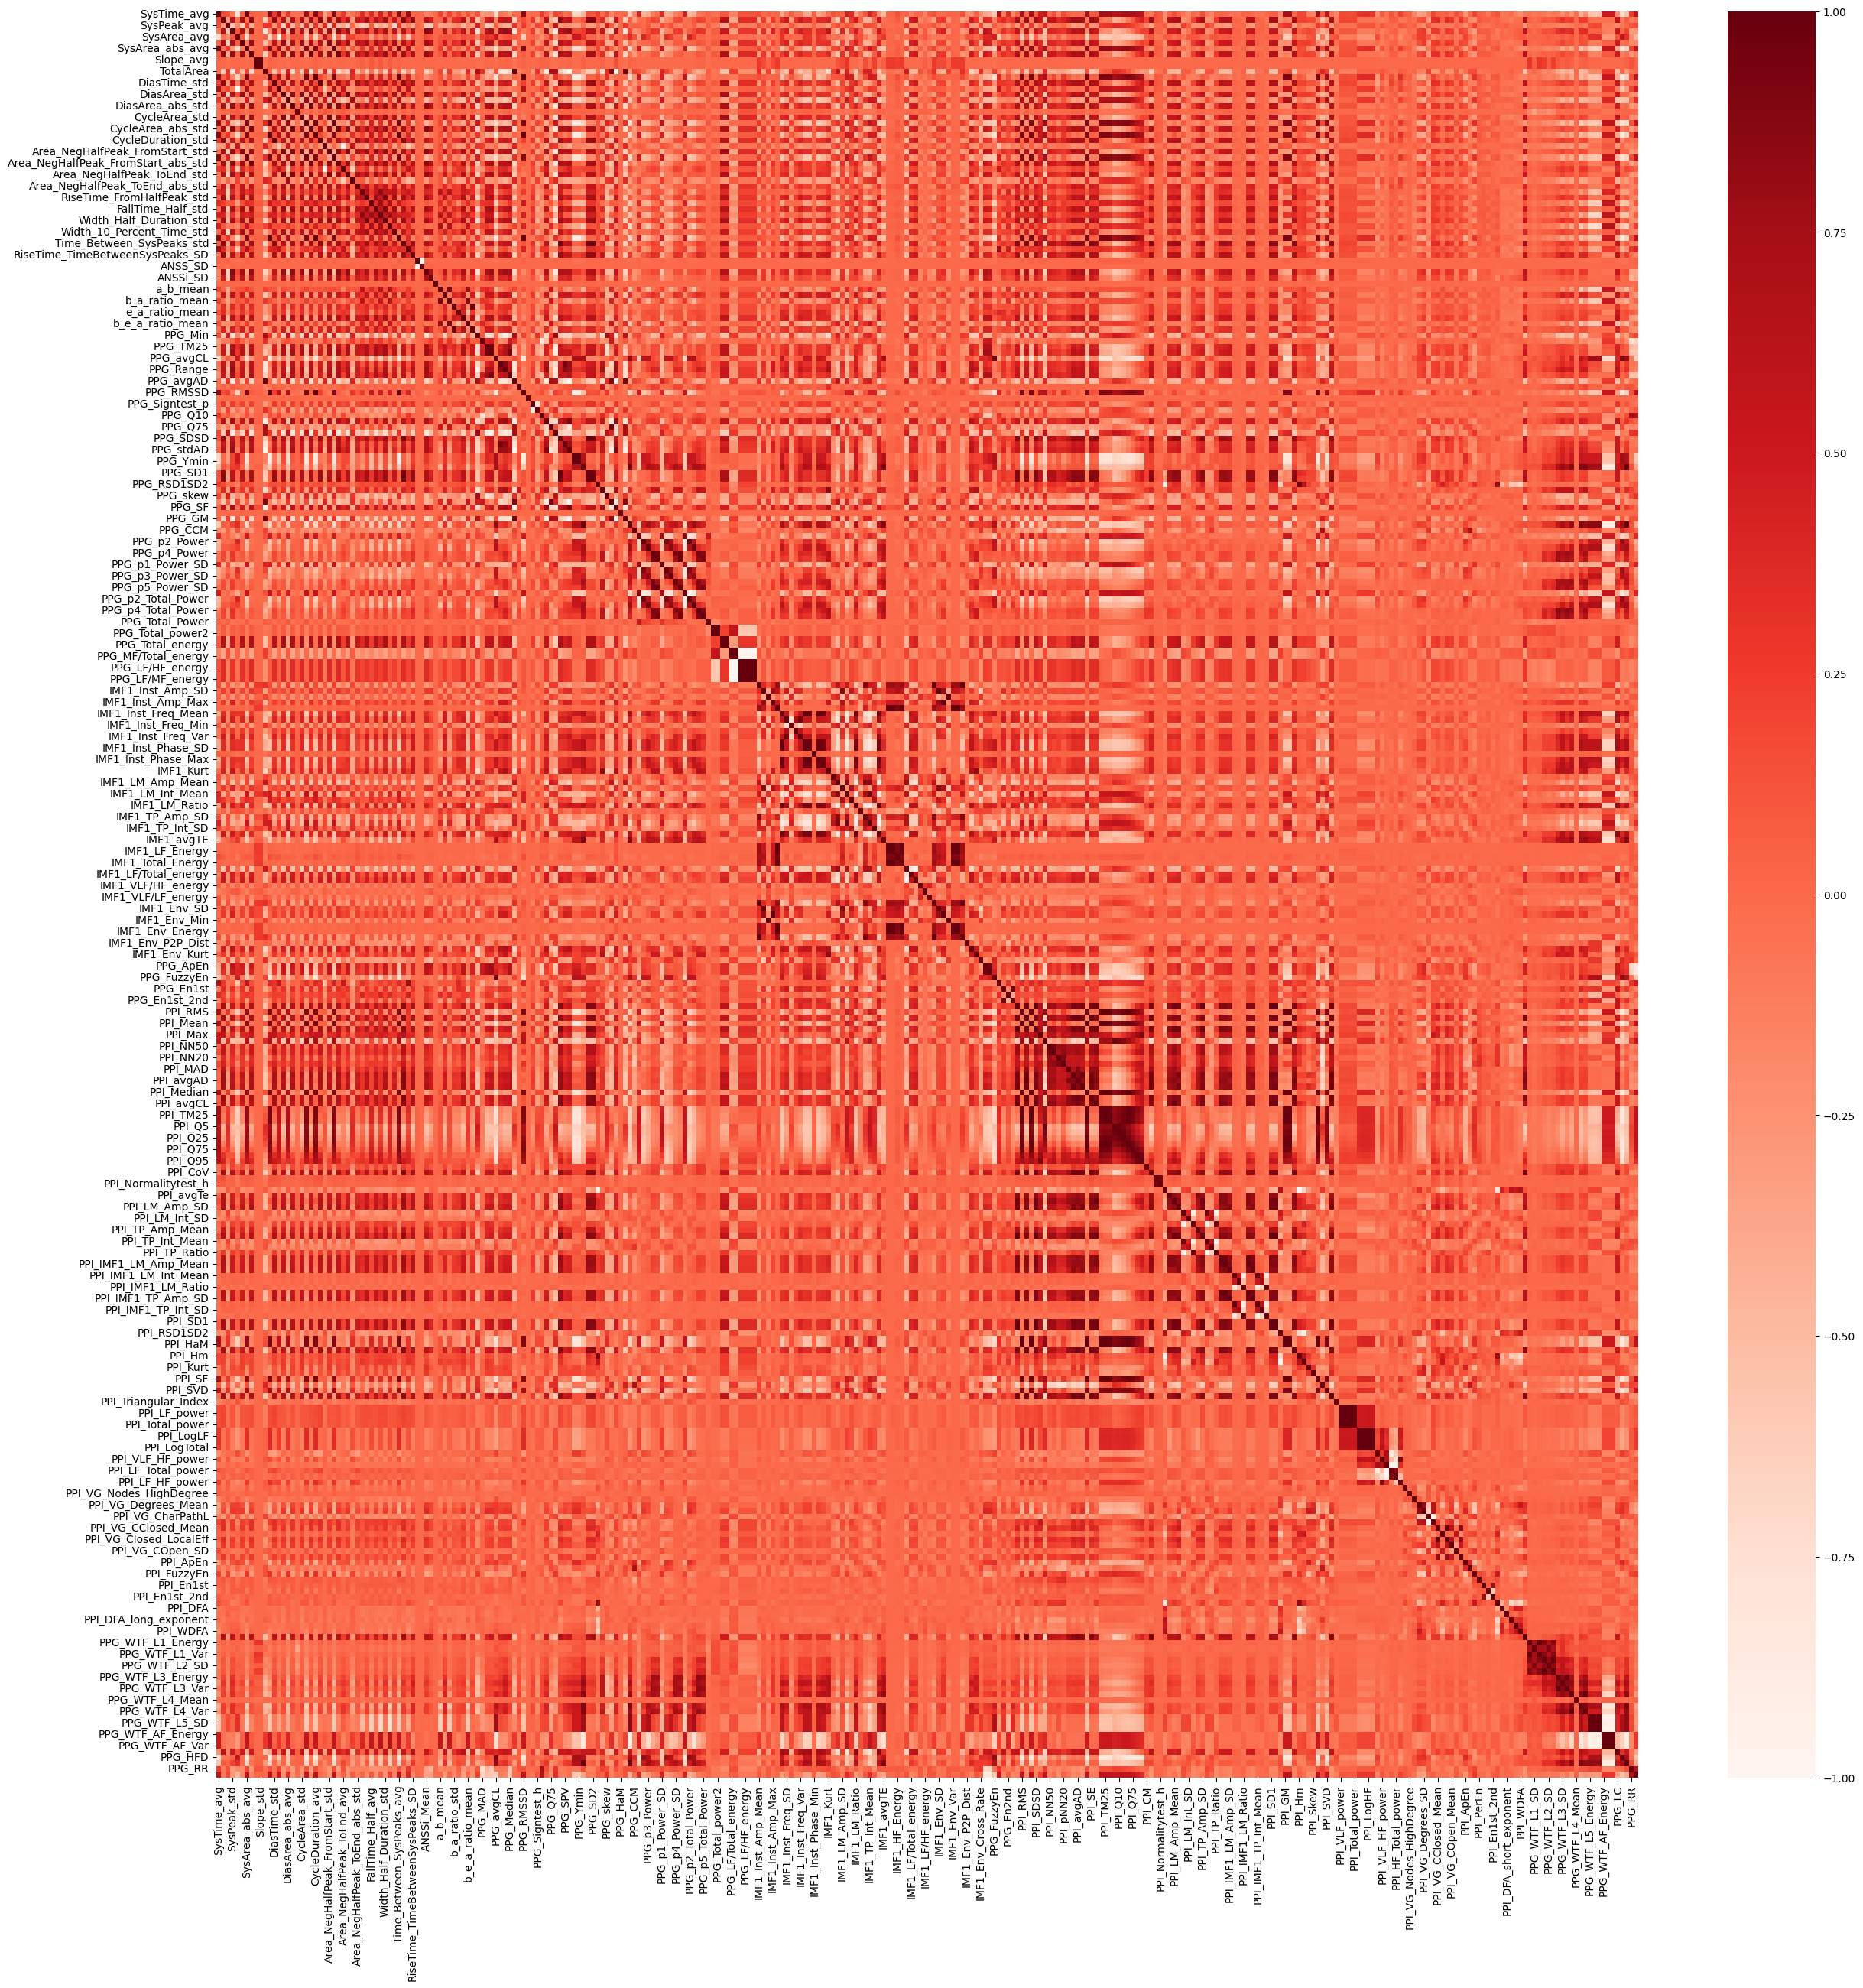

In [ ]:
cor = features_imputed.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()


In [ ]:
# Select upper triangle of correlation matrix
upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Columns to drop due to high correlation:", to_drop)


Columns to drop due to high correlation: ['Slope_std', 'CycleArea_abs_std', 'CycleDuration_avg', 'CycleDuration_std', 'Area_NegHalfPeak_FromStart_abs_avg', 'Area_NegHalfPeak_FromStart_abs_std', 'Time_Between_SysPeaks_avg', 'b_e_a_ratio_std', 'PPG_avgAD', 'PPG_RMSSD', 'PPG_Ymin', 'PPG_SD1', 'PPG_SD2', 'PPG_Hm', 'PPG_p5_Power_SD', 'PPG_Total_power2', 'PPG_Total_energy', 'PPG_MF/Total_energy', 'PPG_LF/HF_energy', 'PPG_MF/HF_energy', 'PPG_LF/MF_energy', 'IMF1_Inst_Freq_Var', 'IMF1_Inst_Phase_Mean', 'IMF1_Inst_Phase_SD', 'IMF1_Inst_Phase_Max', 'IMF1_Inst_Phase_Var', 'IMF1_TP_Ratio', 'IMF1_VLF_Energy', 'IMF1_LF_Energy', 'IMF1_Total_Energy', 'IMF1_Env_Mean', 'IMF1_Env_SD', 'IMF1_Env_Max', 'IMF1_Env_Min', 'IMF1_Env_Var', 'IMF1_Env_Energy', 'IMF1_Env_Area', 'PPG_FuzzyEn', 'PPG_En1st_2nd', 'PPI_Mean', 'PPI_SDSD', 'PPI_pNN50', 'PPI_stdAD', 'PPI_avgAD', 'PPI_Range', 'PPI_Median', 'PPI_SE', 'PPI_avgCL', 'PPI_avgE', 'PPI_TM25', 'PPI_TM50', 'PPI_Q5', 'PPI_Q10', 'PPI_Q25', 'PPI_Q50', 'PPI_Q75', 'PPI_C

In [ ]:
# Drop these columns from the DataFrame
df_revised = df.drop(columns=to_drop)

In [ ]:
# Check NaNs

nan_columns = df_revised.columns[df_revised.isna().any()].tolist()

print("Columns with NaN values:")
print(nan_columns)

nan_counts = df_revised.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts[nan_counts > 0])

# Calculate the threshold for 10% of the total number of rows
threshold = 0.02 * len(df_revised)

# Filter columns where the number of NaN values exceeds the threshold
nan_columns_2percent = nan_counts[nan_counts >= threshold]

# Print the columns with NaN values exceeding the threshold
print("Columns with NaN values exceeding 2% of the total data:")
print(nan_columns_2percent)


Columns with NaN values:
['Slope_avg', 'a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std', 'e_a_ratio_mean', 'e_a_ratio_std', 'b_e_a_ratio_mean', 'PPI_RMSSD', 'PPI_RMS', 'PPI_SDNN', 'PPI_Max', 'PPI_Min', 'PPI_NN50', 'PPI_NN20', 'PPI_pNN20', 'PPI_MAD', 'PPI_Q90', 'PPI_Q95', 'PPI_CM', 'PPI_Signtest_p', 'PPI_Normalitytest_h', 'PPI_rPP', 'PPI_avgTe', 'PPI_LM_Amp_SD', 'PPI_LM_Int_Mean', 'PPI_LM_Int_SD', 'PPI_LM_Ratio', 'PPI_TP_Amp_Mean', 'PPI_TP_Int_SD', 'PPI_TP_Ratio', 'PPI_IMF1_avgTe', 'PPI_IMF1_LM_Amp_SD', 'PPI_IMF1_LM_Int_Mean', 'PPI_IMF1_LM_Int_SD', 'PPI_IMF1_LM_Ratio', 'PPI_IMF1_TP_Int_SD', 'PPI_RSD1SD2', 'PPI_Ha', 'PPI_Hm', 'PPI_Hc', 'PPI_Kurt', 'PPI_Skew', 'PPI_CCM', 'PPI_SVD', 'PPI_Triangular_Index', 'PPI_VLF_power', 'PPI_LogVLF', 'PPI_VLF_LF_power', 'PPI_VLF_HF_power', 'PPI_VLF_Total_power', 'PPI_LF_Total_power', 'PPI_HF_Total_power', 'PPI_LF_HF_power', 'PPI_VG_Nodes_SmallDegree', 'PPI_VG_Nodes_HighDegree', 'PPI_VG_Slope_PowerLawFit', 'PPI_VG_Degrees_Mean', 'PPI_VG_Degrees_S

In [ ]:
# Drop columns where more than 2% of data is NaNs
columns_to_drop = ['PPI_VG_Slope_PowerLawFit', 'PPI_VG_COpen_Mean', 'PPI_VG_COpen_SD']

# Drop the specified columns from the DataFrame
df_revised = df_revised.drop(columns=columns_to_drop)


# Prepare X and y

In [ ]:
# Load subjects
df_subjects = pd.read_csv("/content/drive/MyDrive/masters_ppg/subjects.csv")

# Merge
df_revised = df_revised.copy()
df_revised['SubjectID'] = df_subjects['SubjectID']

# Assuming you've already done data preparation up to scaling
# Drop the '2_stages' and 'Subject' columns to get the features
X = df_revised.drop(['3_stages', 'SubjectID'], axis=1) #'PPI_GM', 'PPG_Hc', 'PPI_Signtest_h', 'PPI_Normalitytest_p', 'PPI_peakVLF'

# Convert labels and subjects for later use
y = df_revised['3_stages']
groups = df_revised['SubjectID']


# RUS

## Balance the dataset

In [ ]:
from imblearn.pipeline import Pipeline as ImblearnPipeline
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler

def resample_within_groups(X, y, groups):
    unique_groups = np.unique(groups)
    resampled_X, resampled_y, resampled_groups = [], [], []
    imputer = SimpleImputer(strategy='mean')  # Define the imputer

    for group in unique_groups:
        mask = groups == group
        X_g, y_g = X[mask], y[mask]

        # Impute missing values
        X_g = imputer.fit_transform(X_g)

        try:
            rus = RandomUnderSampler(random_state=42)
            X_resampled_g, y_resampled_g = rus.fit_resample(X_g, y_g)
        except ValueError:
            print(f"RUS failed for group {group}, using original samples.")
            X_resampled_g, y_resampled_g = X_g, y_g  # Fallback to original data

        resampled_X.append(pd.DataFrame(X_resampled_g, columns=X.columns))
        resampled_y.append(pd.Series(y_resampled_g))
        resampled_groups.extend([group] * len(y_resampled_g))

    return pd.concat(resampled_X, ignore_index=True), pd.concat(resampled_y, ignore_index=True), np.array(resampled_groups)

# Then you can call this function as before:
X_resampled, y_resampled, groups_resampled = resample_within_groups(X, y, groups)


In [ ]:
# Get classes in X_train
label_counts = y_resampled.value_counts()
print(label_counts)

3_stages
0    8669
1    8669
2    8669
Name: count, dtype: int64


In [ ]:
# Get classes in X_train
label_counts = y.value_counts()
print(label_counts)

3_stages
1    54947
0    16128
2    14467
Name: count, dtype: int64


# Feature Selection

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GroupKFold
from imblearn.pipeline import Pipeline as ImblearnPipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, matthews_corrcoef


# Create the full pipeline including the preprocessing and the classifier
pipeline = ImblearnPipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# This function will be used by RFECV to determine feature importances
def get_feature_importances(estimator):
    # Assuming that 'classifier' is the name given to the RandomForestClassifier step within your pipeline
    if hasattr(estimator.named_steps['classifier'], 'feature_importances_'):
        return estimator.named_steps['classifier'].feature_importances_
    else:
        raise ValueError('The classifier does not have an attribute feature_importances_')

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)

# Initialize RFECV with GroupKFold to respect group boundaries in the feature selection process
group_kfold = GroupKFold(n_splits=3)
rfecv = RFECV(
    estimator=pipeline,
    step=2,
    cv=group_kfold.split(X_resampled, y_resampled, groups_resampled),
    scoring=mcc_scorer,
    min_features_to_select=20,
    importance_getter=get_feature_importances,  # Use the custom function for feature importances
    n_jobs=-1  # Use all available processors
)


# Fit RFECV
# Note: We fit directly on the non-preprocessed data since the pipeline takes care of preprocessing
rfecv.fit(X_resampled, y_resampled)  # Ensure groups are passed correctly for GroupKFold

# Output the number of selected features
print(f"Number of selected features: {sum(rfecv.support_)}")
print(f"Best features: {X_resampled.columns[rfecv.support_]}")

Number of selected features: 184
Best features: Index(['SysTime_avg', 'SysTime_std', 'SysPeak_avg', 'SysPeak_std',
       'SysArea_avg', 'SysArea_std', 'SysArea_abs_avg', 'SysArea_abs_std',
       'Slope_avg', 'TotalArea',
       ...
       'PPG_WTF_L3_SD', 'PPG_WTF_L4_Energy', 'PPG_WTF_L4_Mean',
       'PPG_WTF_L4_SD', 'PPG_WTF_L5_Energy', 'PPG_WTF_AF_Energy', 'PPG_LC',
       'PPG_HFD', 'PPG_RR', 'PPG_DET'],
      dtype='object', length=184)


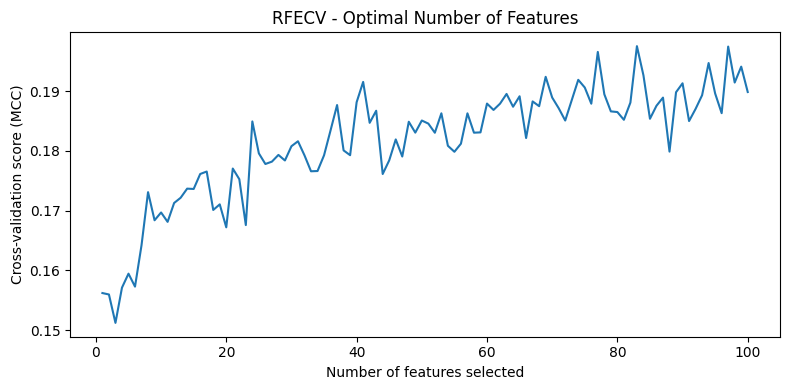

In [ ]:
# Plot the number of features vs. cross-validation scores
plt.figure(figsize=(8, 4))
plt.title("RFECV - Optimal Number of Features")
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (MCC)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.tight_layout()
plt.show()

In [ ]:
# Get the indices that would sort the array, then select the last three for the top scores
top_three_indices = np.argsort(rfecv.cv_results_['mean_test_score'])[-3:]

# Now use these indices to retrieve the top three scores
top_three_scores = rfecv.cv_results_['mean_test_score'][top_three_indices]

# Print out the top three scores
print(top_three_scores)

#select the first top score that gets under 100 features

[0.1965476  0.19744302 0.19751249]


In [ ]:
# Assuming 'rfecv' is your fitted RFECV object and 'X_train' is your feature set before feature selection
threshold = 0.1975


# The number of features for each subset tested during RFECV is not directly given by rfecv.grid_scores_
# It is, however, implicitly defined by the length of the 'grid_scores_' array.
# The number of features tested ranges from 1 to len(rfecv.grid_scores_)
num_features_tested = np.arange(1, len(rfecv.cv_results_['mean_test_score']) + 1)

# Now, find the indices where the cross-validation score is above the threshold
indices_above_threshold = np.where(rfecv.cv_results_['mean_test_score'] > threshold)[0]

# If we have indices that are above the threshold, find the first peak
if indices_above_threshold.size > 0:
    first_peak_index = indices_above_threshold[0]
    num_features_at_first_peak = num_features_tested[first_peak_index]
    print(f"Number of features at the first peak above the threshold: {num_features_at_first_peak}")

    # Select features according to the 'support_' attribute
    selected_features = rfecv.support_
    # The 'support_' attribute is a boolean mask indicating which features are selected
    # We can use it directly to get the feature names
    selected_feature_names = X_resampled.columns[selected_features]
    print(f"Selected features at first peak (score above {threshold}):")
    print(selected_feature_names[:num_features_at_first_peak])
else:
    print(f"No scores above the threshold of {threshold}.")

Number of features at the first peak above the threshold: 83
Selected features at first peak (score above 0.1975):
Index(['SysTime_avg', 'SysTime_std', 'SysPeak_avg', 'SysPeak_std',
       'SysArea_avg', 'SysArea_std', 'SysArea_abs_avg', 'SysArea_abs_std',
       'Slope_avg', 'TotalArea', 'DiasTime_avg', 'DiasTime_std',
       'DiasArea_avg', 'DiasArea_std', 'DiasArea_abs_avg', 'DiasArea_abs_std',
       'CycleArea_avg', 'CycleArea_std', 'CycleArea_abs_avg',
       'Area_NegHalfPeak_FromStart_avg', 'Area_NegHalfPeak_FromStart_std',
       'Area_NegHalfPeak_ToEnd_avg', 'Area_NegHalfPeak_ToEnd_std',
       'Area_NegHalfPeak_ToEnd_abs_avg', 'Area_NegHalfPeak_ToEnd_abs_std',
       'RiseTime_FromHalfPeak_avg', 'RiseTime_FromHalfPeak_std',
       'FallTime_Half_avg', 'FallTime_Half_std', 'Width_Half_Duration_avg',
       'Width_Half_Duration_std', 'Width_10_Percent_Time_avg',
       'Width_10_Percent_Time_std', 'Time_Between_SysPeaks_std',
       'RiseTime_TimeBetweenSysPeaks_Mean', 'RiseTi

In [ ]:
X_selected = X_resampled[['SysTime_avg', 'SysTime_std', 'SysPeak_avg', 'SysPeak_std',
       'SysArea_avg', 'SysArea_std', 'SysArea_abs_avg', 'SysArea_abs_std',
       'Slope_avg', 'TotalArea', 'DiasTime_avg', 'DiasTime_std',
       'DiasArea_avg', 'DiasArea_std', 'DiasArea_abs_avg', 'DiasArea_abs_std',
       'CycleArea_avg', 'CycleArea_std', 'CycleArea_abs_avg',
       'Area_NegHalfPeak_FromStart_avg', 'Area_NegHalfPeak_FromStart_std',
       'Area_NegHalfPeak_ToEnd_avg', 'Area_NegHalfPeak_ToEnd_std',
       'Area_NegHalfPeak_ToEnd_abs_avg', 'Area_NegHalfPeak_ToEnd_abs_std',
       'RiseTime_FromHalfPeak_avg', 'RiseTime_FromHalfPeak_std',
       'FallTime_Half_avg', 'FallTime_Half_std', 'Width_Half_Duration_avg',
       'Width_Half_Duration_std', 'Width_10_Percent_Time_avg',
       'Width_10_Percent_Time_std', 'Time_Between_SysPeaks_std',
       'RiseTime_TimeBetweenSysPeaks_Mean', 'RiseTime_TimeBetweenSysPeaks_SD',
       'ANSS_Mean', 'ANSS_SD', 'ANSSi_Mean', 'ANSSi_SD', 'PPG_PWV', 'a_b_mean',
       'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std', 'e_a_ratio_mean',
       'e_a_ratio_std', 'b_e_a_ratio_mean', 'PPG_Min', 'PPG_MAD', 'PPG_TM25',
       'PPG_TM50', 'PPG_avgCL', 'PPG_Max', 'PPG_Range', 'PPG_Median', 'PPG_CM',
       'PPG_Q10', 'PPG_Q25', 'PPG_Q75', 'PPG_Q90', 'PPG_SDSD', 'PPG_SPV',
       'PPG_stdAD', 'PPG_avgTe', 'PPG_RSD1SD2', 'PPG_kurt', 'PPG_skew',
       'PPG_IQR', 'PPG_SF', 'PPG_HaM', 'PPG_GM', 'PPG_p1_Power',
       'PPG_p2_Power', 'PPG_p3_Power', 'PPG_p4_Power', 'PPG_p1_Power_SD',
       'PPG_p2_Power_SD', 'PPG_p3_Power_SD', 'PPG_p4_Power_SD',
       'PPG_p1_Total_Power', 'PPG_p2_Total_Power', 'PPG_p3_Total_Power']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


sfm = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, random_state=42))
sfm.fit(X_resampled, y_resampled)

# Get the boolean mask indicating which features are selected
selected_features_mask = sfm.get_support()

# Get the names of the selected features from the original DataFrame
selected_features = X_resampled.columns[selected_features_mask]

print("Selected features:", selected_features)


Selected features: Index(['SysTime_avg', 'SysTime_std', 'SysPeak_avg', 'SysPeak_std',
       'SysArea_avg', 'SysArea_std', 'SysArea_abs_avg', 'Slope_avg',
       'TotalArea', 'DiasTime_avg',
       ...
       'PPI_DFA_long_exponent', 'PPI_PDFA', 'PPI_WDFA', 'PPG_WTF_L4_Energy',
       'PPG_WTF_L4_SD', 'PPG_WTF_L5_Energy', 'PPG_LC', 'PPG_HFD', 'PPG_RR',
       'PPG_DET'],
      dtype='object', length=106)


In [ ]:
X_selected = X_resampled[selected_features]
X_selected

,SysTime_avg,SysTime_std,SysPeak_avg,SysPeak_std,SysArea_avg,SysArea_std,SysArea_abs_avg,Slope_avg,TotalArea,DiasTime_avg,...,PPI_DFA_long_exponent,PPI_PDFA,PPI_WDFA,PPG_WTF_L4_Energy,PPG_WTF_L4_SD,PPG_WTF_L5_Energy,PPG_LC,PPG_HFD,PPG_RR,PPG_DET
0,0.243075,0.106977,2.051287,1.271953,-1.285312,14.791261,0.190149,0.129524,20.185956,0.665483,...,0.643539,1.408947,1.041127,73.786172,0.544357,469.265490,56.679685,1.596500,0.103262,0.916861
1,0.343277,0.225440,1.927268,1.754324,2.661957,17.248446,0.190526,0.250397,18.963432,0.897964,...,0.841074,0.518060,1.191702,124.451367,0.706797,986.855721,59.669821,1.481480,0.100278,0.961463
2,0.274200,0.101530,2.242864,1.318513,0.956881,15.603188,0.206661,0.152634,22.063562,0.709604,...,0.426304,0.171287,0.566286,47.301892,0.435842,452.286898,61.623213,1.512300,0.070013,0.889709
3,0.437240,0.398992,2.824896,1.867212,-1.905432,15.568619,0.304404,0.299215,21.087311,0.984896,...,0.873746,0.499770,0.691065,357.419869,1.197743,748.970794,62.408353,1.531390,0.075477,0.864056
4,0.274282,0.135000,2.913433,0.555042,1.484555,19.700900,0.274228,0.094563,25.268359,0.757390,...,0.608242,0.976507,1.272573,51.561563,0.455048,495.221854,56.876811,1.638568,0.066558,0.853705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26002,0.409598,0.161856,2.779713,0.556937,2.794175,8.161561,0.398708,0.143079,25.457833,1.028460,...,0.429506,0.419967,0.541854,15.943494,0.253040,256.924127,49.714330,1.342336,0.086039,0.939421
26003,0.407924,0.180552,2.843130,0.436726,3.764476,6.137564,0.391921,0.140289,25.379892,1.038504,...,0.381899,0.771164,1.019350,14.880416,0.244443,278.888960,49.435375,1.358866,0.078836,0.928423
26004,0.442419,0.181819,2.878130,0.405570,3.186255,8.046523,0.425947,0.151923,25.565984,1.084201,...,0.464905,0.747794,0.693862,13.421065,0.232162,271.286679,49.513925,1.326756,0.087218,0.941216
26005,0.433160,0.148427,2.842621,0.466751,2.494186,6.366794,0.420283,0.149057,25.505711,1.059606,...,0.550226,0.279725,0.559280,12.280122,0.222076,274.819348,49.657028,1.326426,0.087186,0.942385


In [ ]:
for column in X_selected.columns:
    print(column)

SysTime_avg
SysTime_std
SysPeak_avg
SysPeak_std
SysArea_avg
SysArea_std
SysArea_abs_avg
Slope_avg
TotalArea
DiasTime_avg
DiasArea_avg
DiasArea_std
DiasArea_abs_avg
DiasArea_abs_std
CycleArea_std
Area_NegHalfPeak_FromStart_avg
Area_NegHalfPeak_ToEnd_avg
Area_NegHalfPeak_ToEnd_abs_avg
RiseTime_FromHalfPeak_avg
RiseTime_FromHalfPeak_std
FallTime_Half_avg
FallTime_Half_std
Width_Half_Duration_avg
Width_Half_Duration_std
Width_10_Percent_Time_avg
Width_10_Percent_Time_std
RiseTime_TimeBetweenSysPeaks_Mean
RiseTime_TimeBetweenSysPeaks_SD
ANSS_Mean
ANSSi_Mean
ANSSi_SD
PPG_PWV
a_b_mean
a_b_std
b_a_ratio_mean
b_a_ratio_std
e_a_ratio_mean
e_a_ratio_std
b_e_a_ratio_mean
PPG_Min
PPG_MAD
PPG_TM25
PPG_TM50
PPG_avgCL
PPG_Median
PPG_CM
PPG_Q10
PPG_Q25
PPG_Q75
PPG_Q90
PPG_SDSD
PPG_stdAD
PPG_RSD1SD2
PPG_kurt
PPG_skew
PPG_IQR
PPG_SF
PPG_GM
PPG_p3_Power
PPG_p4_Power
PPG_p1_Power_SD
PPG_p3_Power_SD
PPG_p4_Power_SD
PPG_p1_Total_Power
PPG_p2_Total_Power
PPG_p3_Total_Power
PPG_p4_Total_Power
IMF1_Inst_Amp_Mea

# Hyperparameter tuning

In [ ]:
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Split your data into a smaller subset for quick exploration
X_sample, _, y_sample, _, groups_sample, _ = train_test_split(X_selected, y_resampled, groups_resampled, test_size=0.5, random_state=42, stratify = y_resampled)

# Initialize the pipeline with the steps
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameters for RandomizedSearchCV, ensuring they're prefixed according to the pipeline steps
param_dist_rf = {
    'classifier__n_estimators': sp_randint(100, 500),
    'classifier__max_depth': [None] + list(range(3, 20)),
    'classifier__min_samples_split': sp_randint(2, 11),
    'classifier__min_samples_leaf': sp_randint(1, 11),
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

# Define the GroupKFold cross-validator
gkf = GroupKFold(n_splits=3)

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)

# Set up RandomizedSearchCV with the pipeline
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,  # Use the pipeline as the estimator
    param_distributions=param_dist_rf,
    n_iter=100,  # Adjust based on computational resources
    scoring=mcc_scorer,  # Choose an appropriate scoring method
    n_jobs=-1,  # Use all available cores
    cv=gkf.split(X_sample, y_sample, groups_sample),  # Ensure GroupKFold uses group information
    verbose=3,
    random_state=42,
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_sample, y_sample)

# After fitting, output the best parameters and score
print("Best parameters found: ", random_search_rf.best_params_)
print("Best score: ", random_search_rf.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'classifier__bootstrap': True, 'classifier__max_depth': 18, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 353}
Best score:  0.18742759289421992


# Model Training

## 5-fold CV

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=18,
    max_features='sqrt',
    min_samples_leaf=8,
    min_samples_split=5,
    n_estimators=353,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 3

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_5cv = np.zeros((3, 3), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_5cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_5cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_5cv = metrics_df_5cv.mean()
metrics_std_5cv = metrics_df_5cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_5cv)
print(metrics_std_5cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_5cv)


Test set distribution: 3_stages
0    1733
1    1733
2    1733
Name: count, dtype: int64
Test set distribution: 3_stages
0    1740
1    1740
2    1740
Name: count, dtype: int64
Test set distribution: 3_stages
0    1741
1    1741
2    1741
Name: count, dtype: int64
Test set distribution: 3_stages
0    1723
1    1723
2    1723
Name: count, dtype: int64
Test set distribution: 3_stages
0    1732
1    1732
2    1732
Name: count, dtype: int64
Accuracy       0.462312
Sensitivity    0.462312
Specificity    0.731156
Precision      0.462312
F1 Score       0.462312
MCC            0.194436
dtype: float64
Accuracy       0.021440
Sensitivity    0.021440
Specificity    0.010720
Precision      0.021440
F1 Score       0.021440
MCC            0.031998
dtype: float64
Final Confusion Matrix:
 [[4865 1936 1868]
 [2691 3371 2607]
 [2258 2624 3787]]


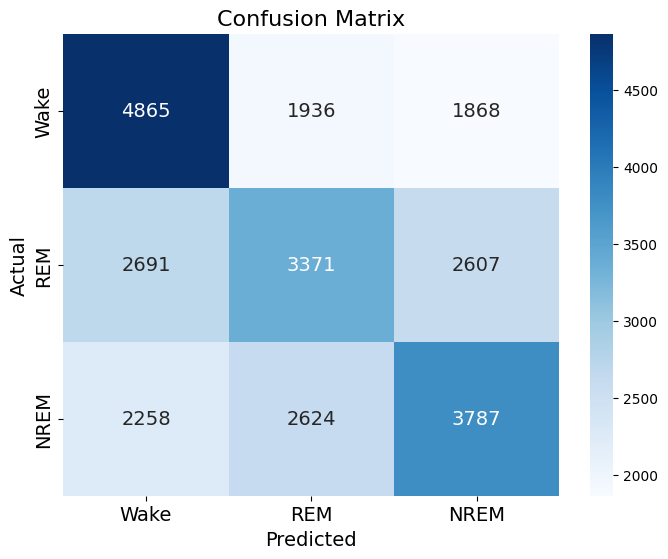

In [ ]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_5cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'REM', 'NREM'], yticklabels=['Wake', 'REM', 'NREM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

### Feature importances

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold
import numpy as np
import pandas as pd


# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Define the number of classes
n_classes = 3

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [ ]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv5 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances[0],
    'Class 1 Importances': average_importances[1],
    'Class 2 Importances': average_importances[2]
})

# Adding a column for the overall importance (mean)
importances_df_cv5['Overall Importance (Mean)'] = importances_df_cv5[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv5

,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Overall Importance (Mean)
0,SysTime_avg,0.007825,0.008605,0.009702,0.008711
1,SysTime_std,0.007822,0.008182,0.008681,0.008228
2,SysPeak_avg,0.008112,0.008483,0.008821,0.008472
3,SysPeak_std,0.007667,0.007679,0.008833,0.008059
4,SysArea_avg,0.008812,0.009593,0.010596,0.009667
...,...,...,...,...,...
101,PPG_WTF_L5_Energy,0.007466,0.009054,0.007873,0.008131
102,PPG_LC,0.022169,0.010626,0.014247,0.015681
103,PPG_HFD,0.008613,0.009426,0.008631,0.008890
104,PPG_RR,0.007542,0.010627,0.008870,0.009013


In [ ]:
importances_df_cv5.to_csv('importances_df_cv5_rus.csv')

### Feature plotting

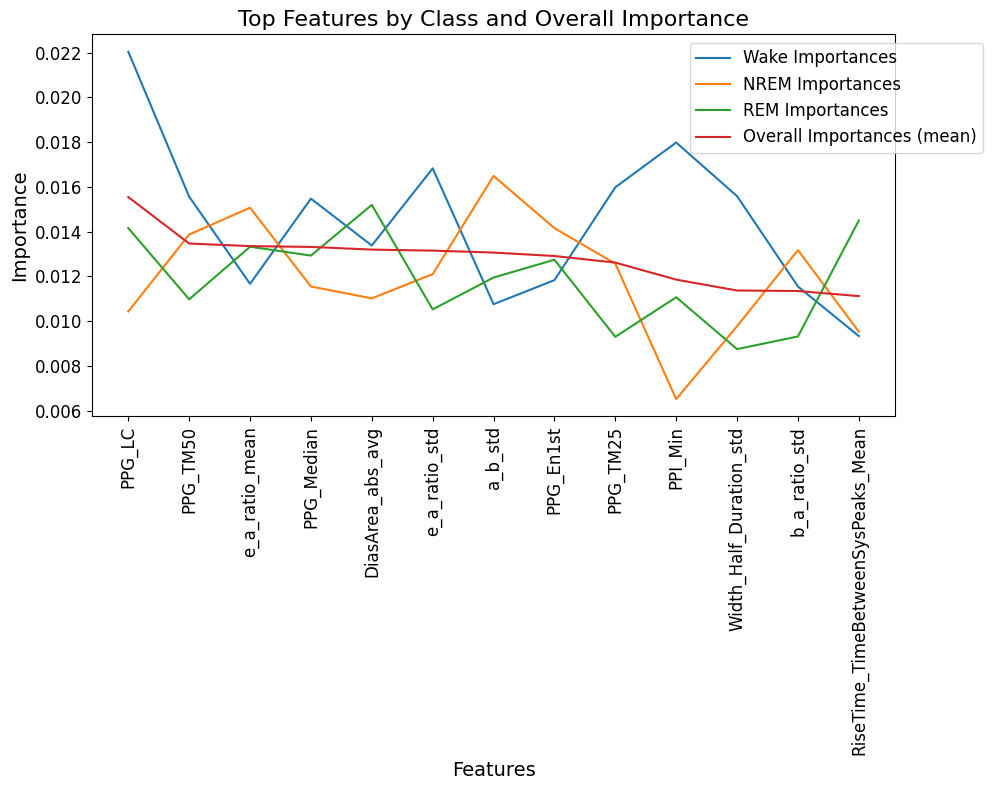

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 for each class
top_class_0 = importances_df_cv5.nlargest(5, 'Class 0 Importances')['Feature']
top_class_1 = importances_df_cv5.nlargest(5, 'Class 1 Importances')['Feature']
top_class_2 = importances_df_cv5.nlargest(5, 'Class 2 Importances')['Feature']
top_overall = importances_df_cv5.nlargest(5, 'Overall Importance (Mean)')['Feature']

# Combine and deduplicate the lists of top features
top_features = pd.concat([top_class_0, top_class_1, top_class_2, top_overall]).drop_duplicates()

# Filter the DataFrame to only include the top features
filtered_df = importances_df_cv5[importances_df_cv5['Feature'].isin(top_features)]

# Sort the DataFrame by 'Overall Importance (Mean)' in descending order for plotting
filtered_df = filtered_df.sort_values(by='Overall Importance (Mean)', ascending=False)

# Melt the DataFrame for easier plotting
melted_df = pd.melt(filtered_df, id_vars=['Feature'], var_name='Class', value_name='Importance')

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
lineplot = sns.lineplot(data=melted_df, x='Feature', y='Importance', hue='Class')

# Customize the x-axis with feature names
plt.xticks(rotation=90, fontsize=12)  # Rotate the x labels for better readability
plt.yticks(fontsize=12)

plt.title('Top Features by Class and Overall Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.grid(False)

# Customizing legend labels
handles, labels = lineplot.get_legend_handles_labels()
new_labels = ['Wake Importances' if label == 'Class 0 Importances' else label for label in labels]
new_labels = ['NREM Importances' if label == 'Class 1 Importances' else label for label in new_labels]
new_labels = ['REM Importances' if label == 'Class 2 Importances' else label for label in new_labels]
new_labels = ['Overall Importances (mean)' if 'Mean' in label else label for label in new_labels]  # Rename overall if used

plt.legend(handles=handles, labels=new_labels, loc='upper right', bbox_to_anchor=(1.12, 1), fontsize=12, frameon=True, shadow=True, fancybox=True)
plt.tight_layout()
plt.show()


In [ ]:
# Select the top 5 features for each class and overall
top_features_class_0 = importances_df_cv5.nlargest(5, 'Class 0 Importances')
top_features_class_1 = importances_df_cv5.nlargest(5, 'Class 1 Importances')
top_features_class_2 = importances_df_cv5.nlargest(5, 'Class 2 Importances')
top_features_overall = importances_df_cv5.nlargest(5, 'Overall Importance (Mean)')

# Reset index to get the feature names in a column (if they are set as the index)
top_features_class_0 = top_features_class_0.reset_index()
top_features_class_1 = top_features_class_1.reset_index()
top_features_class_2 = top_features_class_2.reset_index()
top_features_overall = top_features_overall.reset_index()

# Combine the DataFrames and melt for plotting
top_features_combined = pd.concat([
    top_features_class_0.assign(Class='Wake').melt(id_vars=['Feature', 'Class'], value_vars=['Class 0 Importances'], value_name='Importance'),
    top_features_class_1.assign(Class='NREM').melt(id_vars=['Feature', 'Class'], value_vars=['Class 1 Importances'], value_name='Importance'),
    top_features_class_2.assign(Class='REM').melt(id_vars=['Feature', 'Class'], value_vars=['Class 2 Importances'], value_name='Importance'),
    top_features_overall.assign(Class='Overall').melt(id_vars=['Feature', 'Class'], value_vars=['Overall Importance (Mean)'], value_name='Importance')
])


# Map overall importance to each feature
overall_importance_map = top_features_overall.set_index('Feature')['Overall Importance (Mean)'].to_dict()
top_features_combined['Overall Importance (Mean)'] = top_features_combined['Feature'].map(overall_importance_map)

# Sort the DataFrame by 'Overall Importance (Mean)' in descending order
top_features_combined_sorted = top_features_combined.sort_values(by='Overall Importance (Mean)', ascending=False)

# Print sorted DataFrame
top_features_combined_sorted



,Feature,Class,variable,Importance,Overall Importance (Mean)
0,PPG_LC,Wake,Class 0 Importances,0.022038,0.015543
2,PPG_LC,REM,Class 2 Importances,0.014157,0.015543
0,PPG_LC,Overall,Overall Importance (Mean),0.015543,0.015543
3,PPG_TM50,NREM,Class 1 Importances,0.013871,0.013469
1,PPG_TM50,Overall,Overall Importance (Mean),0.013469,0.013469
1,e_a_ratio_mean,NREM,Class 1 Importances,0.015067,0.013353
2,e_a_ratio_mean,Overall,Overall Importance (Mean),0.013353,0.013353
3,e_a_ratio_mean,REM,Class 2 Importances,0.013325,0.013353
3,PPG_Median,Overall,Overall Importance (Mean),0.013317,0.013317
4,PPG_Median,REM,Class 2 Importances,0.012929,0.013317


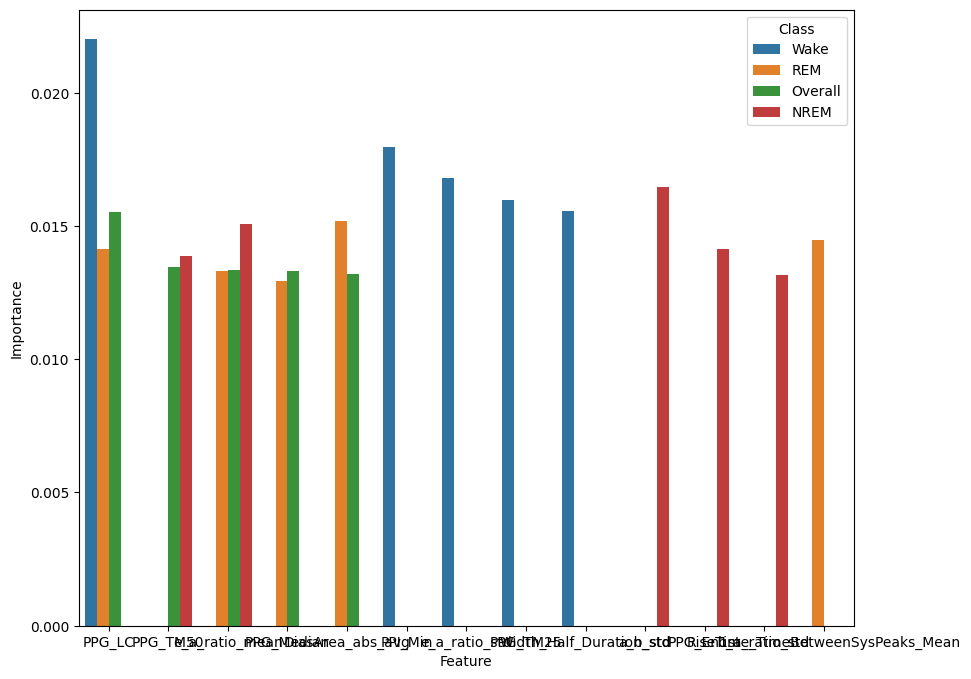

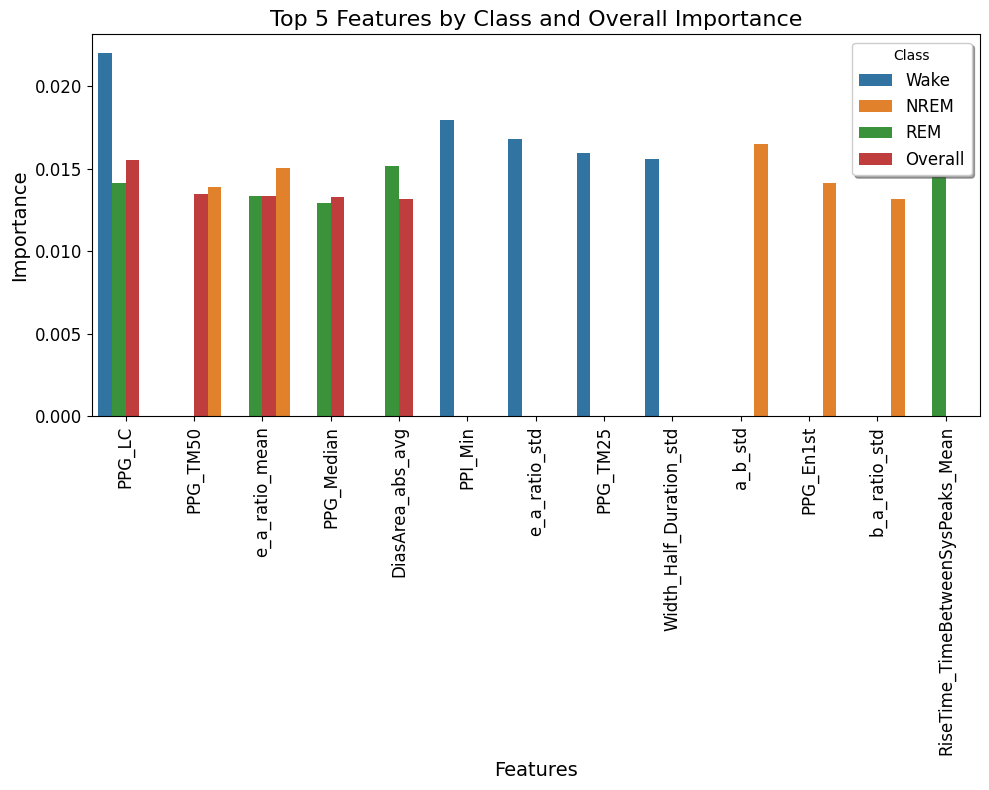

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with the combined DataFrame
plt.figure(figsize=(10, 8))
barplot = sns.barplot(data=top_features_combined_sorted, x='Feature', y='Importance', hue='Class')

# Define a custom palette from Seaborn's "bright" palette
bright_palette = sns.color_palette()
palette = {
    "Wake": bright_palette[0],  # blue
    "REM": bright_palette[2],  # green
    "NREM": bright_palette[1],  # orange
    "Overall": bright_palette[3]  # red
}


# Create the bar plot using the specified color palette
plt.figure(figsize=(10, 8))
barplot = sns.barplot(data=top_features_combined_sorted, x='Feature', y='Importance', hue='Class', palette=palette)

# Improve the aesthetics and legibility of the plot
plt.title('Top 5 Features by Class and Overall Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Adjust the legend to match the desired order and colors
handles, labels = barplot.get_legend_handles_labels()
desired_order = ['Wake', 'NREM','REM', 'Overall']
ordered_handles = [handles[labels.index(lbl)] for lbl in desired_order]

# Create a new legend with the desired order and colors
plt.legend(ordered_handles, desired_order, title='Class', fontsize=12, frameon=True, shadow=True, fancybox=True)

plt.tight_layout()
plt.show()

## 10-fold CV

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=18,
    max_features='sqrt',
    min_samples_leaf=8,
    min_samples_split=5,
    n_estimators=353,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 3

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_10cv = np.zeros((3, 3), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_10cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_10cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_10cv = metrics_df_10cv.mean()
metrics_std_10cv = metrics_df_10cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_10cv)
print(metrics_std_10cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_10cv)


Test set distribution: 3_stages
0    861
1    861
2    861
Name: count, dtype: int64
Test set distribution: 3_stages
0    870
1    870
2    870
Name: count, dtype: int64
Test set distribution: 3_stages
0    861
1    861
2    861
Name: count, dtype: int64
Test set distribution: 3_stages
0    878
1    878
2    878
Name: count, dtype: int64
Test set distribution: 3_stages
0    870
1    870
2    870
Name: count, dtype: int64
Test set distribution: 3_stages
0    865
1    865
2    865
Name: count, dtype: int64
Test set distribution: 3_stages
0    860
1    860
2    860
Name: count, dtype: int64
Test set distribution: 3_stages
0    864
1    864
2    864
Name: count, dtype: int64
Test set distribution: 3_stages
0    862
1    862
2    862
Name: count, dtype: int64
Test set distribution: 3_stages
0    878
1    878
2    878
Name: count, dtype: int64
Accuracy       0.468590
Sensitivity    0.468590
Specificity    0.734295
Precision      0.468590
F1 Score       0.468590
MCC            0.204695
dtype:

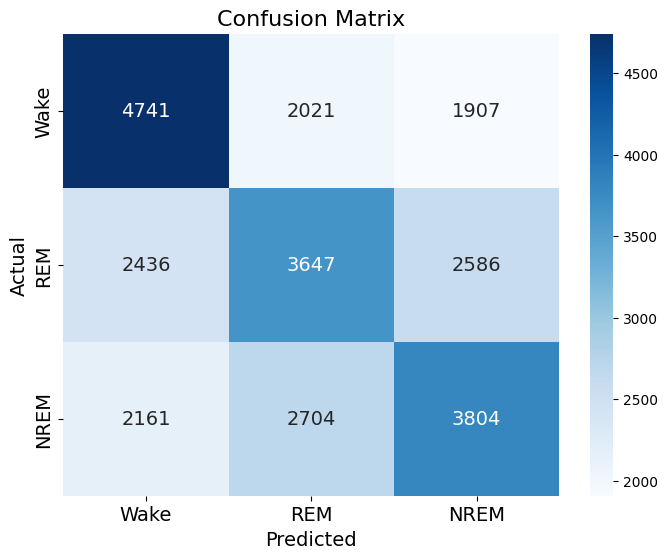

In [ ]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_10cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'REM', 'NREM'], yticklabels=['Wake', 'REM', 'NREM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold


from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=18,
    max_features='sqrt',
    min_samples_leaf=8,
    min_samples_split=5,
    n_estimators=353,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Define the number of classes
n_classes = 3

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances_cv10 = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [ ]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv10 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances_cv10[0],
    'Class 1 Importances': average_importances_cv10[1],
    'Class 2 Importances': average_importances_cv10[2]
})

# Adding a column for the overall importance (mean)
importances_df_cv10['Overall Importance (Mean)'] = importances_df_cv10[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv10

,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Overall Importance (Mean)
0,SysTime_avg,0.007864,0.008637,0.009627,0.008710
1,SysTime_std,0.007552,0.008214,0.008532,0.008099
2,SysPeak_avg,0.008048,0.008627,0.008709,0.008461
3,SysPeak_std,0.007976,0.007708,0.009106,0.008263
4,SysArea_avg,0.008588,0.009734,0.010798,0.009706
...,...,...,...,...,...
101,PPG_WTF_L5_Energy,0.007401,0.009110,0.007921,0.008144
102,PPG_LC,0.022467,0.010443,0.014574,0.015828
103,PPG_HFD,0.008571,0.009457,0.008586,0.008871
104,PPG_RR,0.007648,0.011102,0.008937,0.009229


In [ ]:
importances_df_cv10.to_csv('importances_df_cv10_rus.csv')

# 20-fold CV

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=18,
    max_features='sqrt',
    min_samples_leaf=8,
    min_samples_split=5,
    n_estimators=353,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 3

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_20cv = np.zeros((3, 3), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_20cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_20cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_20cv = metrics_df_20cv.mean()
metrics_std_20cv = metrics_df_20cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_20cv)
print(metrics_std_20cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_20cv)


Test set distribution: 3_stages
0    431
1    431
2    431
Name: count, dtype: int64
Test set distribution: 3_stages
0    428
1    428
2    428
Name: count, dtype: int64
Test set distribution: 3_stages
0    426
1    426
2    426
Name: count, dtype: int64
Test set distribution: 3_stages
0    426
1    426
2    426
Name: count, dtype: int64
Test set distribution: 3_stages
0    432
1    432
2    432
Name: count, dtype: int64
Test set distribution: 3_stages
0    428
1    428
2    428
Name: count, dtype: int64
Test set distribution: 3_stages
0    444
1    444
2    444
Name: count, dtype: int64
Test set distribution: 3_stages
0    436
1    436
2    436
Name: count, dtype: int64
Test set distribution: 3_stages
0    434
1    434
2    434
Name: count, dtype: int64
Test set distribution: 3_stages
0    424
1    424
2    424
Name: count, dtype: int64
Test set distribution: 3_stages
0    424
1    424
2    424
Name: count, dtype: int64
Test set distribution: 3_stages
0    435
1    435
2    435
Name: 

NameError: name 'final_confusion_matrix_10cv' is not defined

In [ ]:
print('Final Confusion Matrix:\n', final_confusion_matrix_20cv)

Final Confusion Matrix:
 [[4714 2030 1925]
 [2456 3699 2514]
 [2161 2772 3736]]


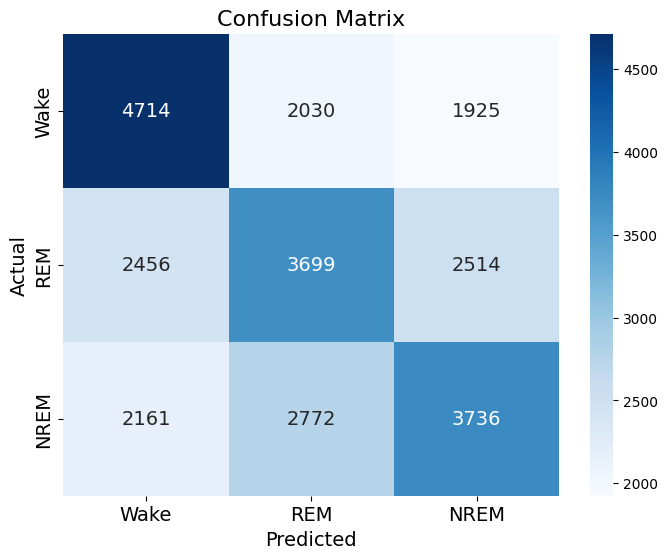

In [ ]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_20cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'REM', 'NREM'], yticklabels=['Wake', 'REM', 'NREM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold
import numpy as np
import pandas as pd


# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Define the number of classes
n_classes = 3

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances_cv20 = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [ ]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv20 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances_cv20[0],
    'Class 1 Importances': average_importances_cv20[1],
    'Class 2 Importances': average_importances_cv20[2]
})

# Adding a column for the overall importance (mean)
importances_df_cv20['Overall Importance (Mean)'] = importances_df_cv20[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv20

importances_df_cv20.to_csv('importances_df_cv20.csv')


In [ ]:
# Load dataframe
importances_df_cv5 = pd.read_csv("importances_df_cv5_rus.csv")

In [ ]:
importance_df_cv10

NameError: name 'importance_df_cv10' is not defined

In [ ]:
importances_df_cv10

,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Overall Importance (Mean)
0,SysTime_avg,0.007864,0.008637,0.009627,0.008710
1,SysTime_std,0.007552,0.008214,0.008532,0.008099
2,SysPeak_avg,0.008048,0.008627,0.008709,0.008461
3,SysPeak_std,0.007976,0.007708,0.009106,0.008263
4,SysArea_avg,0.008588,0.009734,0.010798,0.009706
...,...,...,...,...,...
101,PPG_WTF_L5_Energy,0.007401,0.009110,0.007921,0.008144
102,PPG_LC,0.022467,0.010443,0.014574,0.015828
103,PPG_HFD,0.008571,0.009457,0.008586,0.008871
104,PPG_RR,0.007648,0.011102,0.008937,0.009229


# Feature importances

In [ ]:
# Assuming importances_df_cv10, importances_df_cv5, importances_df_cv20 are already defined
# Step 1: Merge the dataframes on the 'Feature' column
merged_df = pd.merge(importances_df_cv10, importances_df_cv5, on='Feature', suffixes=('_cv10', '_cv5'))
merged_df = pd.merge(merged_df, importances_df_cv20, on='Feature')

# Step 2: Calculate the average importance for each class across the three validation methods
merged_df['Class 0 Average'] = merged_df[['Class 0 Importances_cv10', 'Class 0 Importances_cv5', 'Class 0 Importances']].mean(axis=1)
merged_df['Class 1 Average'] = merged_df[['Class 1 Importances_cv10', 'Class 1 Importances_cv5', 'Class 1 Importances']].mean(axis=1)
merged_df['Class 2 Average'] = merged_df[['Class 2 Importances_cv10', 'Class 2 Importances_cv5', 'Class 2 Importances']].mean(axis=1)

# Step 3: Calculate the overall mean importance from the averages of each class
merged_df['Overall Importance (Mean)'] = merged_df[['Class 0 Average', 'Class 1 Average', 'Class 2 Average']].mean(axis=1)

# Optionally, create a DataFrame to view or export just the features and their importances
final_df = merged_df[['Feature', 'Class 0 Average', 'Class 1 Average', 'Class 2 Average', 'Overall Importance (Mean)']]
final_df

,Feature,Class 0 Average,Class 1 Average,Class 2 Average,Overall Importance (Mean)
0,SysTime_avg,0.007825,0.008646,0.009633,0.008701
1,SysTime_std,0.007664,0.008136,0.008617,0.008139
2,SysPeak_avg,0.008057,0.008574,0.008739,0.008456
3,SysPeak_std,0.007930,0.007704,0.009037,0.008224
4,SysArea_avg,0.008675,0.009675,0.010758,0.009703
...,...,...,...,...,...
101,PPG_WTF_L5_Energy,0.007448,0.009116,0.007870,0.008145
102,PPG_LC,0.022420,0.010528,0.014462,0.015803
103,PPG_HFD,0.008523,0.009484,0.008570,0.008859
104,PPG_RR,0.007640,0.010983,0.008907,0.009176


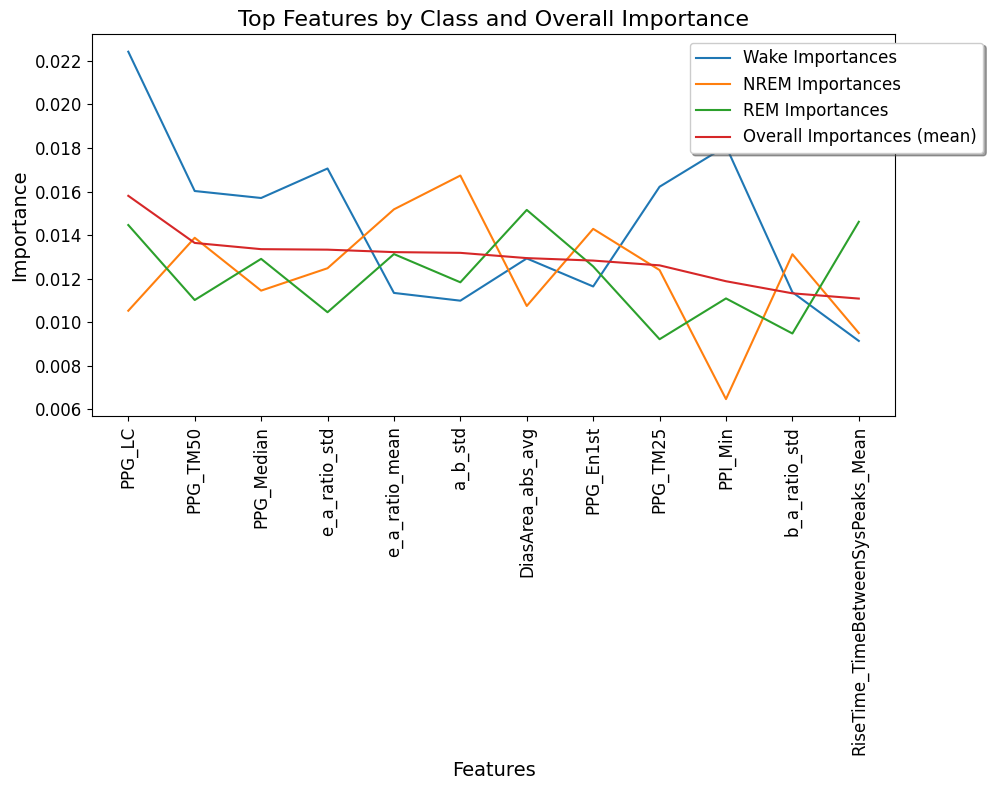

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 for each class
top_class_0 = final_df.nlargest(5, 'Class 0 Average')['Feature']
top_class_1 = final_df.nlargest(5, 'Class 1 Average')['Feature']
top_class_2 = final_df.nlargest(5, 'Class 2 Average')['Feature']
top_overall = final_df.nlargest(5, 'Overall Importance (Mean)')['Feature']

# Combine and deduplicate the lists of top features
top_features = pd.concat([top_class_0, top_class_1, top_class_2, top_overall]).drop_duplicates()

# Filter the DataFrame to only include the top features
filtered_df = final_df[final_df['Feature'].isin(top_features)]

# Sort the DataFrame by 'Overall Importance (Mean)' in descending order for plotting
filtered_df = filtered_df.sort_values(by='Overall Importance (Mean)', ascending=False)

# Melt the DataFrame for easier plotting
melted_df = pd.melt(filtered_df, id_vars=['Feature'], var_name='Class', value_name='Importance')

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
lineplot = sns.lineplot(data=melted_df, x='Feature', y='Importance', hue='Class')

# Customize the x-axis with feature names
plt.xticks(rotation=90, fontsize=12)  # Rotate the x labels for better readability
plt.yticks(fontsize=12)

plt.title('Top Features by Class and Overall Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.grid(False)

# Customizing legend labels
handles, labels = lineplot.get_legend_handles_labels()
new_labels = ['Wake Importances' if label == 'Class 0 Average' else label for label in labels]
new_labels = ['NREM Importances' if label == 'Class 1 Average' else label for label in new_labels]
new_labels = ['REM Importances' if label == 'Class 2 Average' else label for label in new_labels]
new_labels = ['Overall Importances (mean)' if 'Mean' in label else label for label in new_labels]  # Rename overall if used

plt.legend(handles=handles, labels=new_labels, loc='upper right', bbox_to_anchor=(1.12, 1), fontsize=12, frameon=True, shadow=True, fancybox=True)
plt.tight_layout()
plt.show()


In [ ]:
# Select the top 5 features for each class and overall
top_features_class_0 = final_df.nlargest(5, 'Class 0 Average')
top_features_class_1 = final_df.nlargest(5, 'Class 1 Average')
top_features_class_2 = final_df.nlargest(5, 'Class 2 Average')
top_features_overall = final_df.nlargest(5, 'Overall Importance (Mean)')

# Reset index to get the feature names in a column (if they are set as the index)
top_features_class_0 = top_features_class_0.reset_index()
top_features_class_1 = top_features_class_1.reset_index()
top_features_class_2 = top_features_class_2.reset_index()
top_features_overall = top_features_overall.reset_index()

# Combine the DataFrames and melt for plotting
top_features_combined = pd.concat([
    top_features_class_0.assign(Class='Wake').melt(id_vars=['Feature', 'Class'], value_vars=['Class 0 Average'], value_name='Importance'),
    top_features_class_1.assign(Class='NREM').melt(id_vars=['Feature', 'Class'], value_vars=['Class 1 Average'], value_name='Importance'),
    top_features_class_2.assign(Class='REM').melt(id_vars=['Feature', 'Class'], value_vars=['Class 2 Average'], value_name='Importance'),
    top_features_overall.assign(Class='Overall').melt(id_vars=['Feature', 'Class'], value_vars=['Overall Importance (Mean)'], value_name='Importance')
])


# Map overall importance to each feature
overall_importance_map = top_features_overall.set_index('Feature')['Overall Importance (Mean)'].to_dict()
top_features_combined['Overall Importance (Mean)'] = top_features_combined['Feature'].map(overall_importance_map)

# Sort the DataFrame by 'Overall Importance (Mean)' in descending order
top_features_combined_sorted = top_features_combined.sort_values(by='Overall Importance (Mean)', ascending=False)

# Print sorted DataFrame
top_features_combined_sorted



,Feature,Class,variable,Importance,Overall Importance (Mean)
0,PPG_LC,Wake,Class 0 Average,0.022420,0.015803
2,PPG_LC,REM,Class 2 Average,0.014462,0.015803
0,PPG_LC,Overall,Overall Importance (Mean),0.015803,0.015803
4,PPG_TM50,Wake,Class 0 Average,0.016024,0.013640
3,PPG_TM50,NREM,Class 1 Average,0.013877,0.013640
1,PPG_TM50,Overall,Overall Importance (Mean),0.013640,0.013640
4,PPG_Median,REM,Class 2 Average,0.012909,0.013354
2,PPG_Median,Overall,Overall Importance (Mean),0.013354,0.013354
2,e_a_ratio_std,Wake,Class 0 Average,0.017057,0.013331
3,e_a_ratio_std,Overall,Overall Importance (Mean),0.013331,0.013331


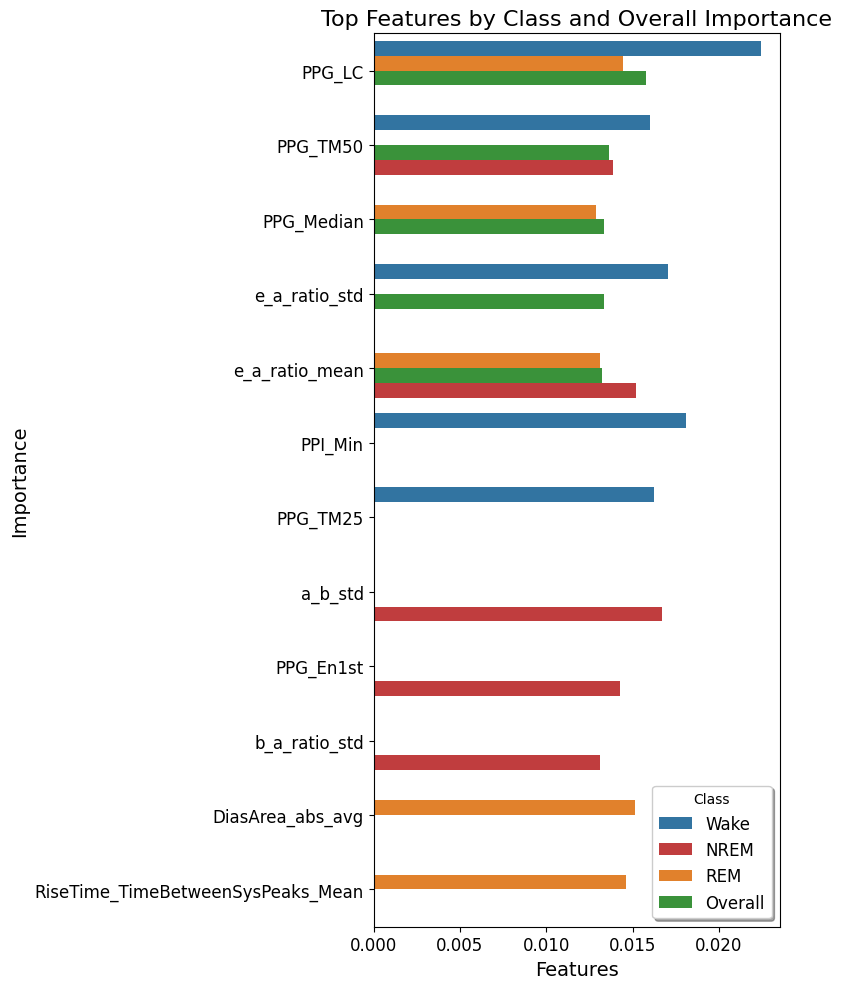

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with the combined DataFrame
plt.figure(figsize=(8, 10))
barplot = sns.barplot(data=top_features_combined_sorted, x='Importance', y='Feature', hue='Class')

# Define a custom palette from Seaborn's "bright" palette
bright_palette = sns.color_palette()
palette = {
    "Wake": bright_palette[0],  # blue
    "REM": bright_palette[2],  # green
    "NREM": bright_palette[1],  # orange
    "Overall": bright_palette[3]  # red
}

# Improve the aesthetics and legibility of the plot
plt.title('Top Features by Class and Overall Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust the legend to match the desired order and colors
handles, labels = barplot.get_legend_handles_labels()
desired_order = ['Wake', 'NREM','REM', 'Overall']
ordered_handles = [handles[labels.index(lbl)] for lbl in desired_order]

# Create a new legend with the desired order and colors
plt.legend(ordered_handles, desired_order, title='Class', fontsize=12, frameon=True, shadow=True, fancybox=True)

plt.tight_layout()
plt.show()

In [ ]:
feature_names = top_features_combined_sorted['Feature'].unique()

In [ ]:
feature_names

array(['PPG_LC', 'PPG_TM50', 'PPG_Median', 'e_a_ratio_std',
       'e_a_ratio_mean', 'PPI_Min', 'PPG_TM25', 'a_b_std', 'PPG_En1st',
       'b_a_ratio_std', 'DiasArea_abs_avg',
       'RiseTime_TimeBetweenSysPeaks_Mean'], dtype=object)

In [ ]:
top_features = X_resampled[['PPG_LC', 'PPG_TM50', 'PPG_Median', 'e_a_ratio_std',
       'e_a_ratio_mean', 'PPI_Min', 'PPG_TM25', 'a_b_std', 'PPG_En1st',
       'b_a_ratio_std', 'DiasArea_abs_avg',
       'RiseTime_TimeBetweenSysPeaks_Mean']]

<ipython-input-21-d62b3f2bbebe>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['class'] = y_resampled  # Add the class labels


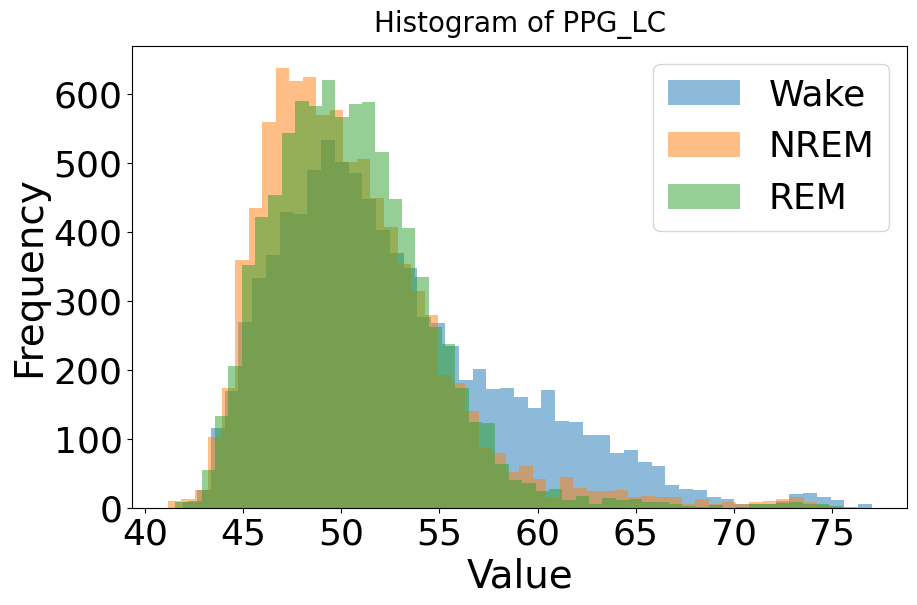

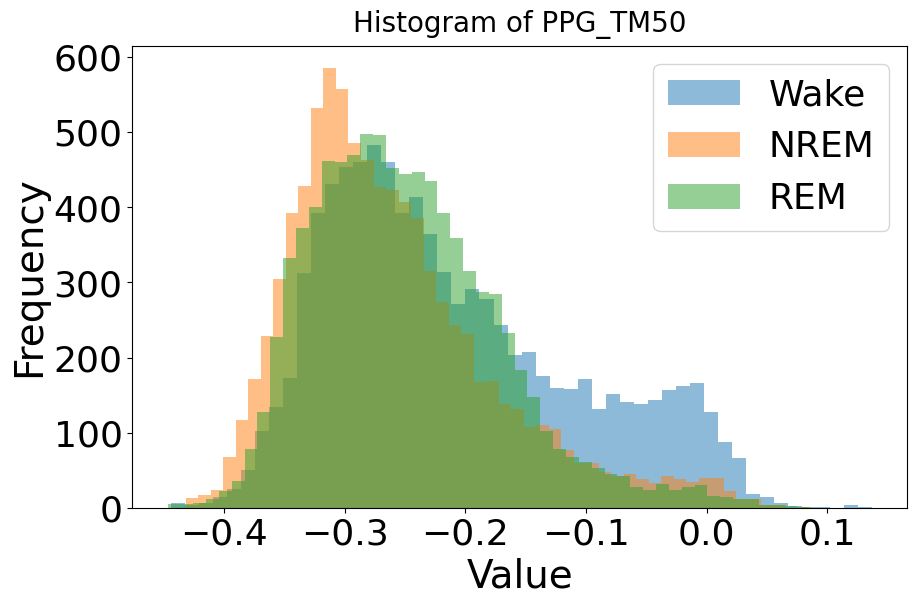

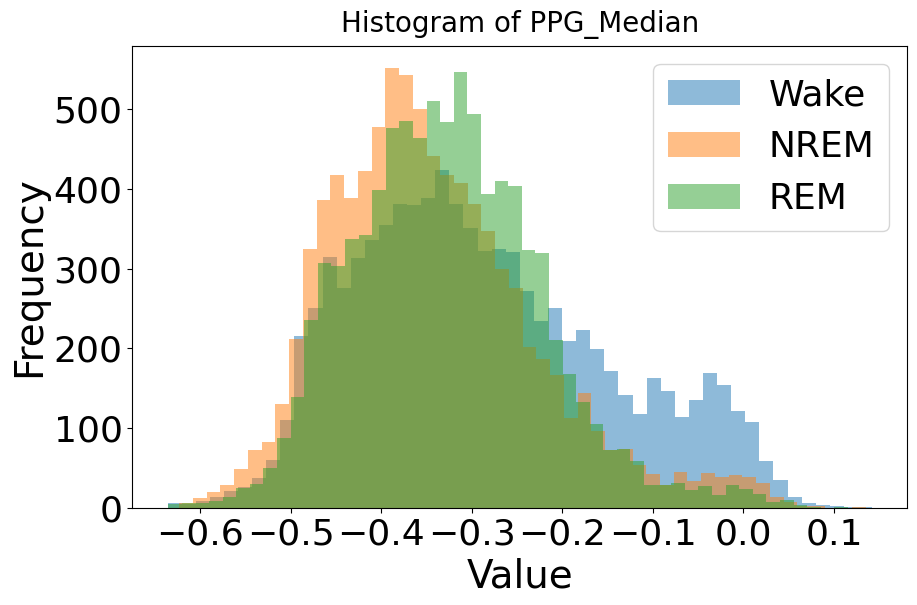

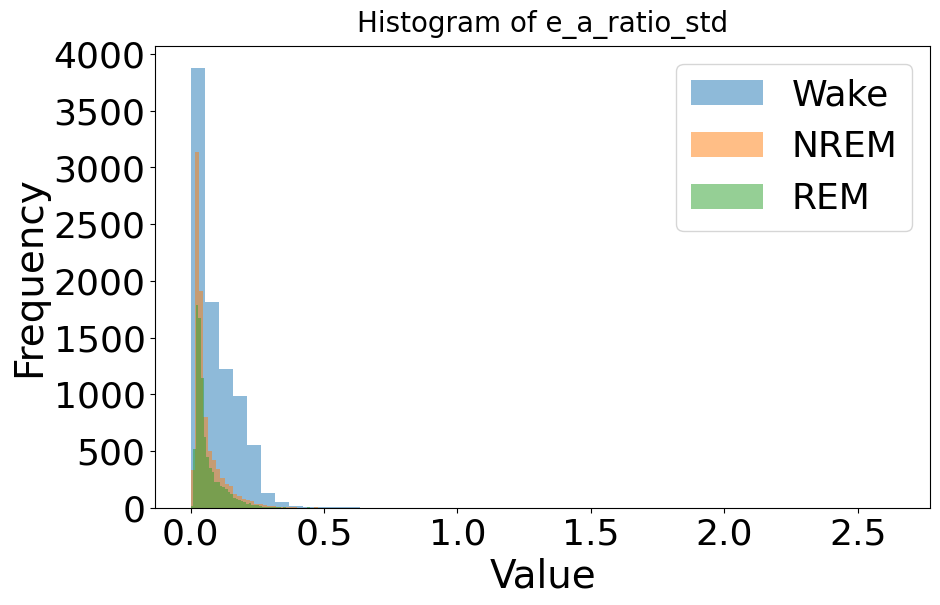

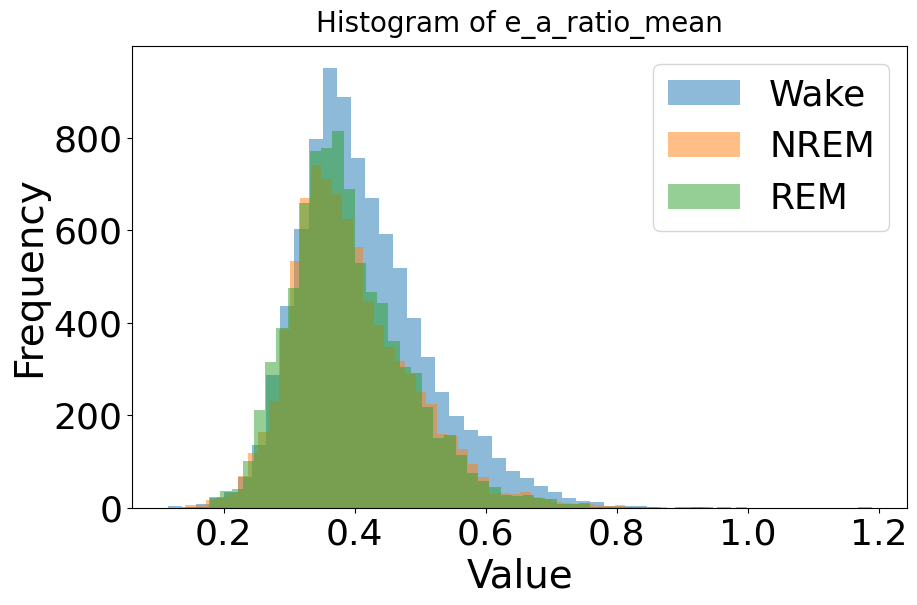

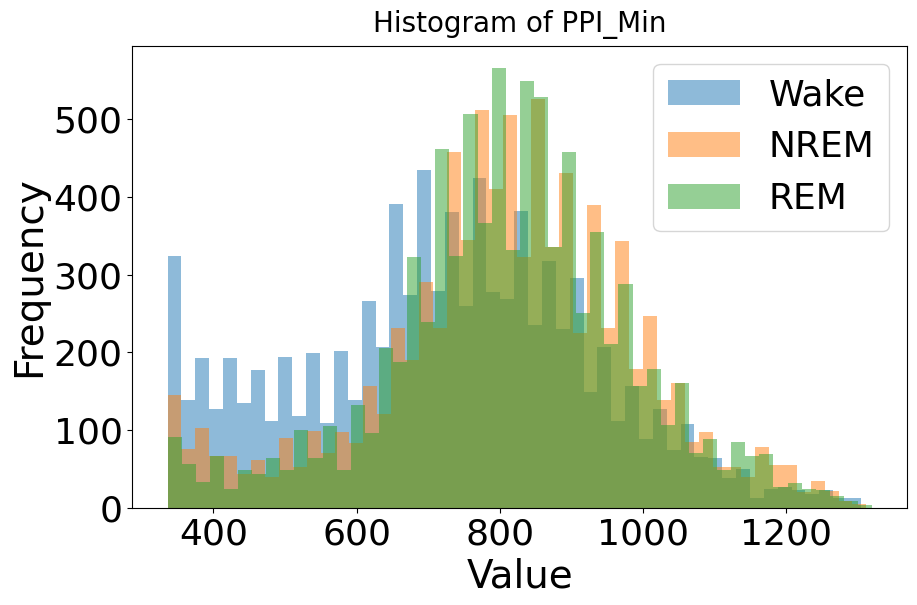

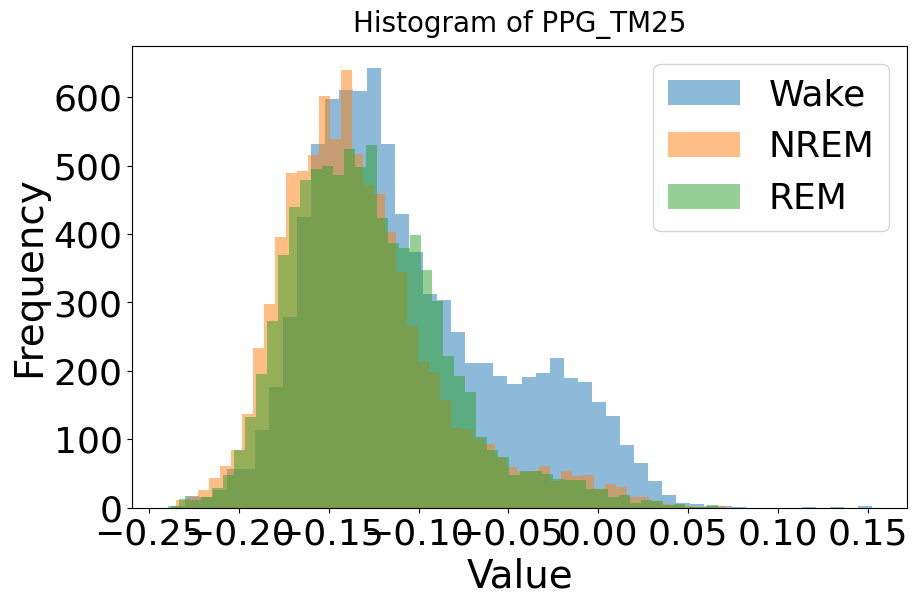

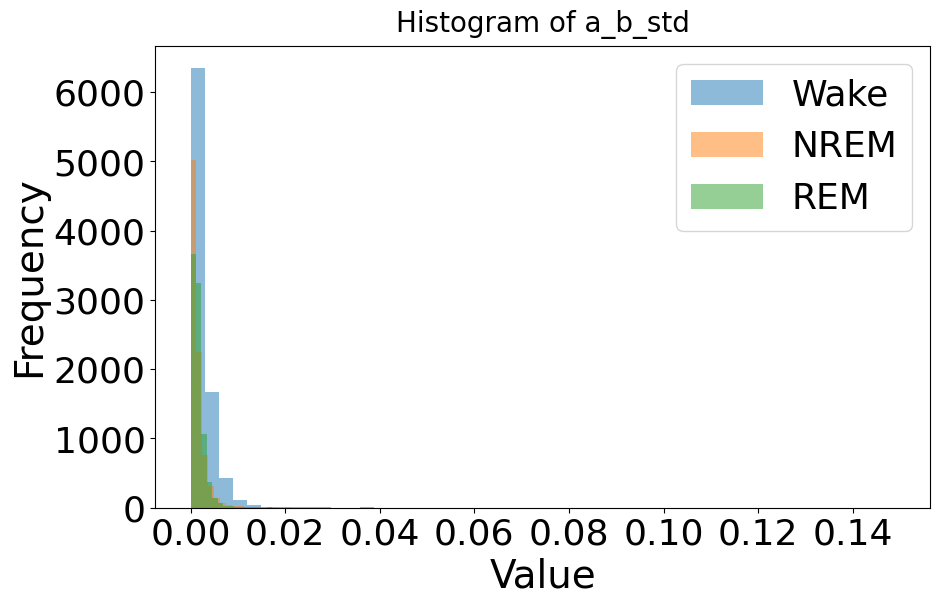

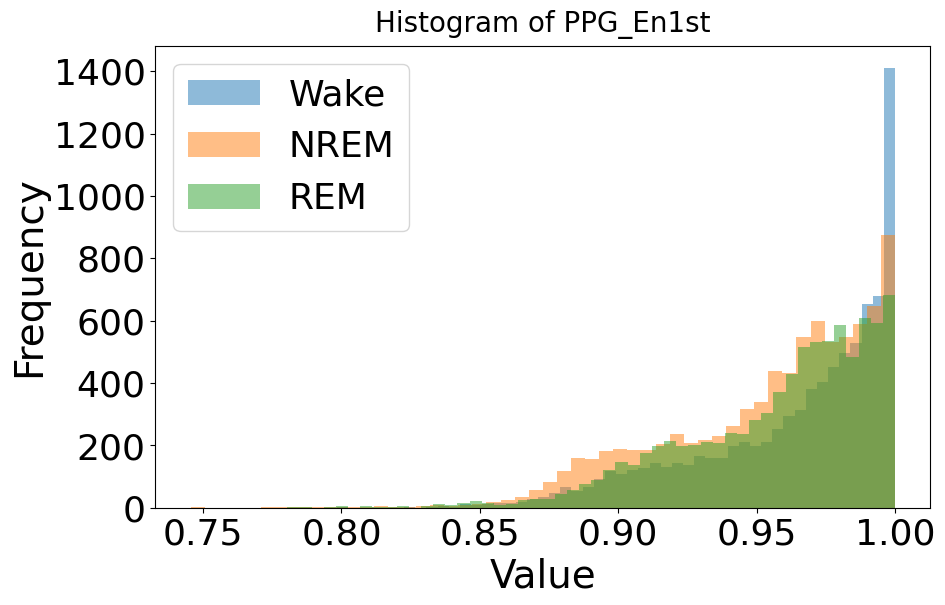

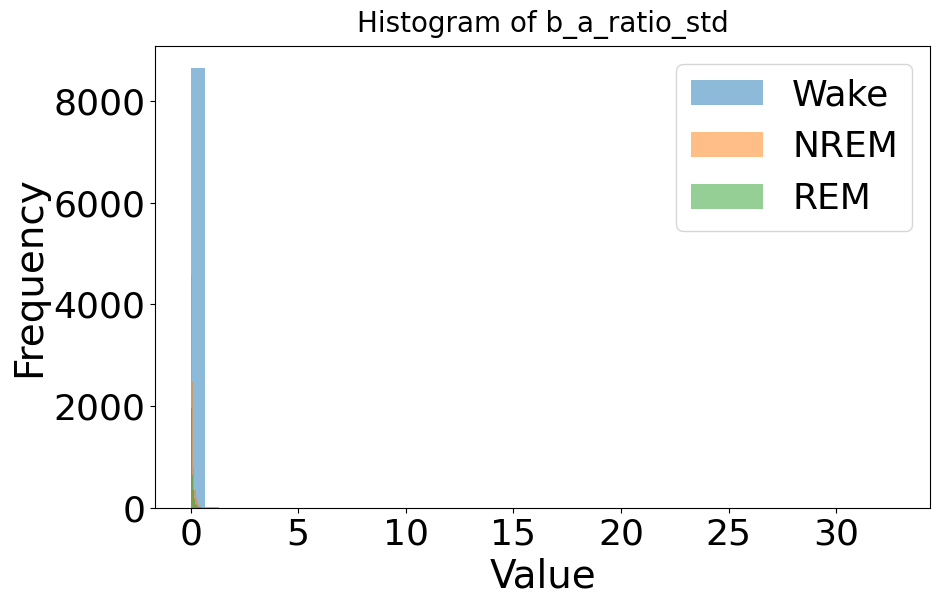

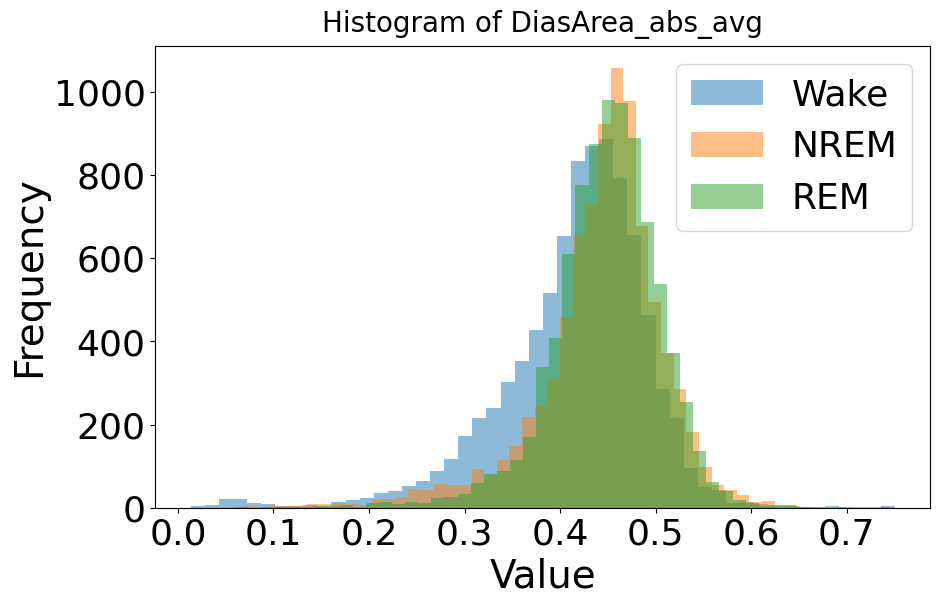

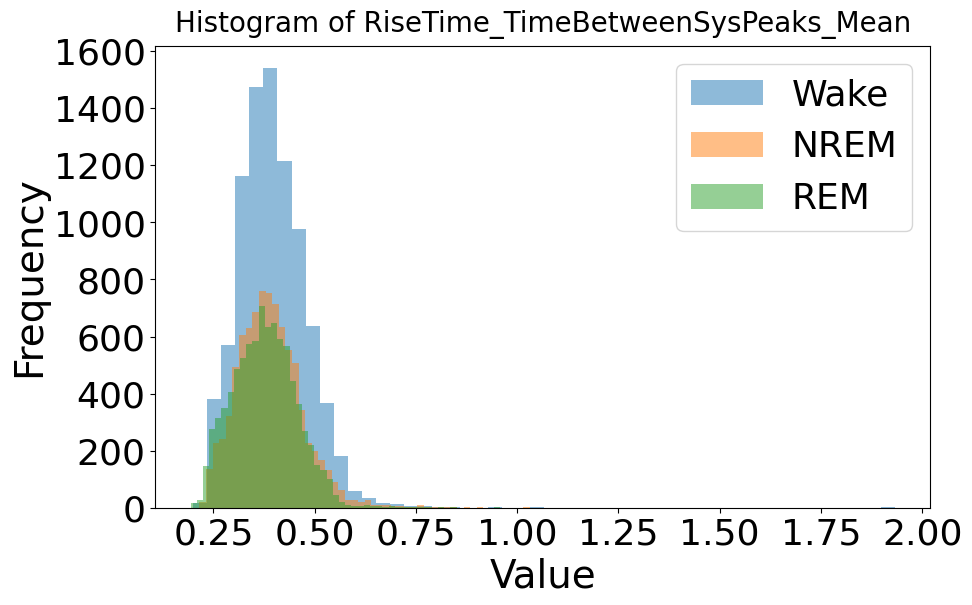

In [ ]:
from matplotlib.ticker import AutoLocator

# Define a dictionary to map class values to sleep stages
class_labels = {
    0: "Wake",
    1: "NREM",
    2: "REM"
}

# Plot histograms for each feature
# Assuming 'top_features' DataFrame and 'y_resampled' Series are already defined
top_features['class'] = y_resampled  # Add the class labels

# Exclude the 'class' column when getting feature names
feature_names = top_features.drop(columns='class').columns

for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Get unique class values from the 'class' column
    for class_value in np.unique(top_features['class']):
        # Subset the data for the current class
        subset = top_features[top_features['class'] == class_value]
        # Plot histogram and use the class_labels dictionary to get the correct label
        plt.hist(subset[feature], bins=50, alpha=0.5, label=class_labels[class_value])
    plt.title(f'Histogram of {feature}', fontsize = 20, pad = 10)
    plt.xlabel('Value', fontsize = 28)
    plt.ylabel('Frequency', fontsize = 28)
    plt.legend(fontsize = 26)

    # Set the x-axis ticks dynamically
    ax = plt.gca()  # Get the current axis
    ax.xaxis.set_major_locator(AutoLocator())  # Automatically adjust x-axis ticks

    plt.xticks (fontsize = 26)
    plt.yticks (fontsize = 26)
    plt.show()


<ipython-input-22-ec87c3d6e012>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['class'] = top_features['class'].map(class_mapping)


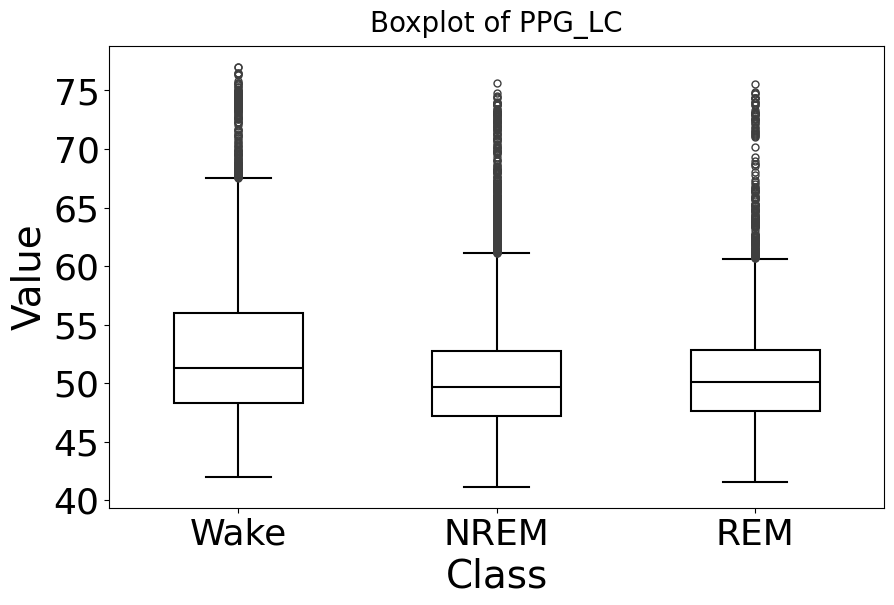

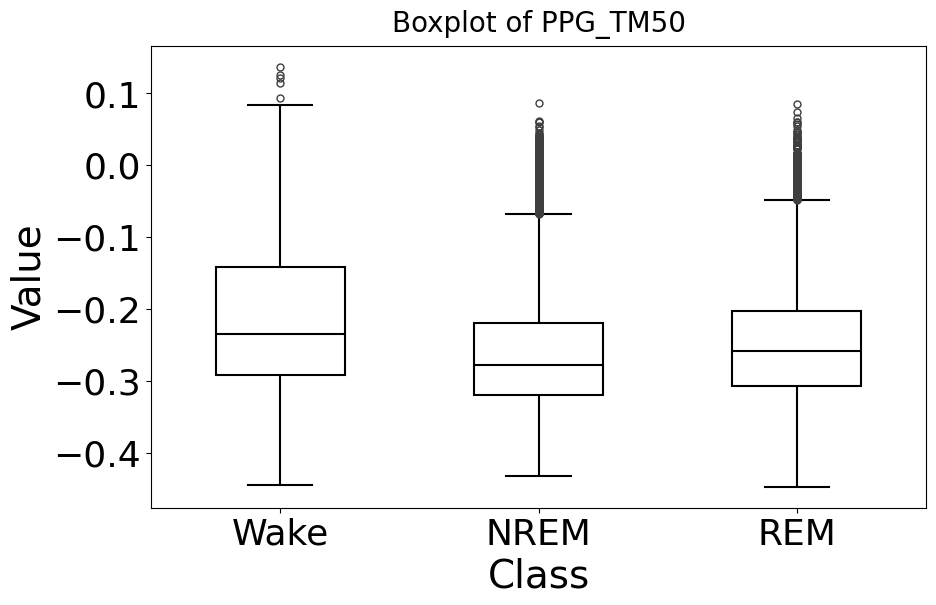

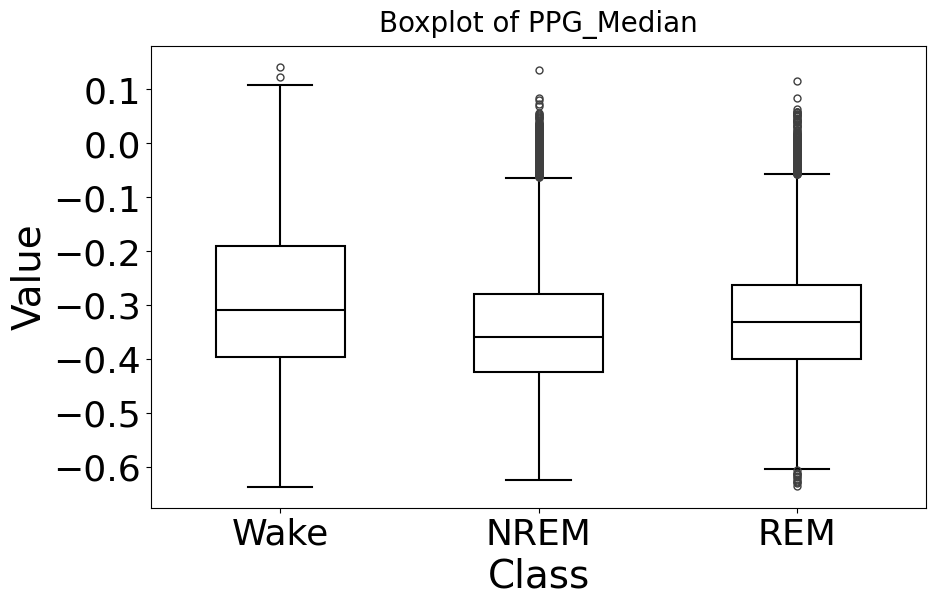

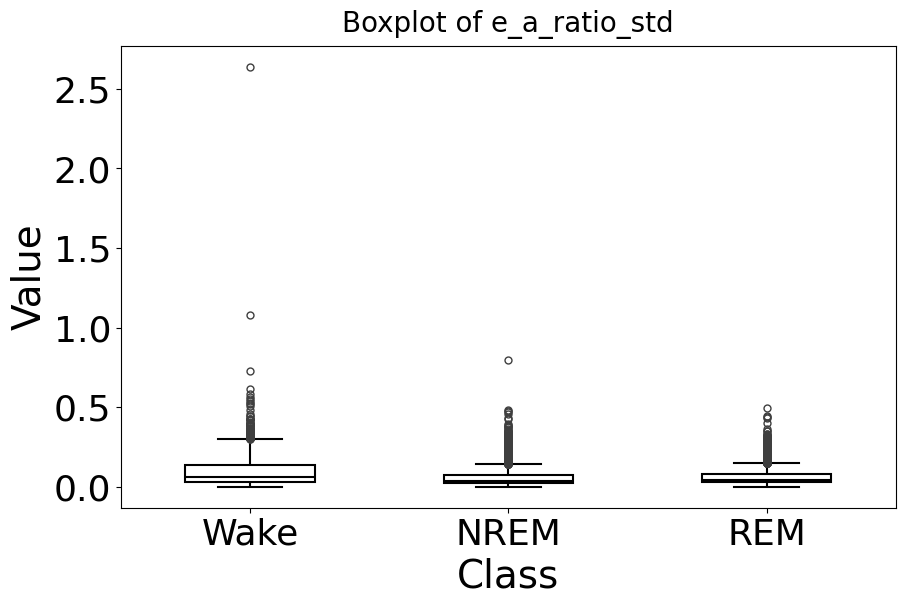

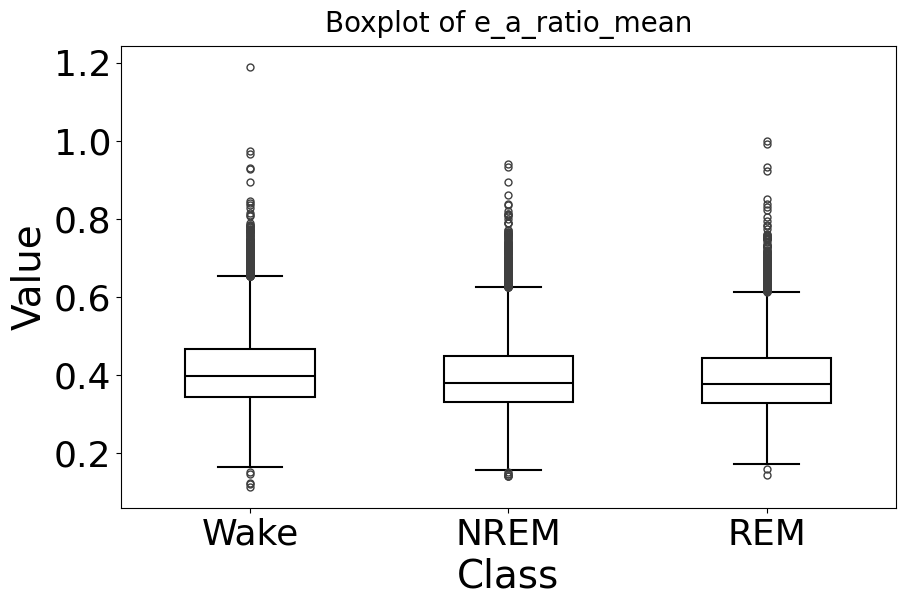

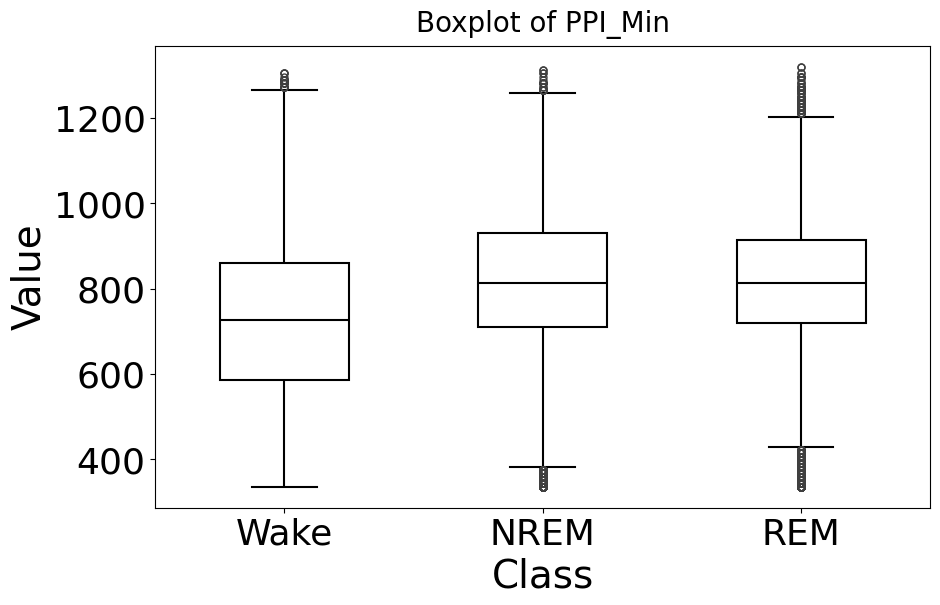

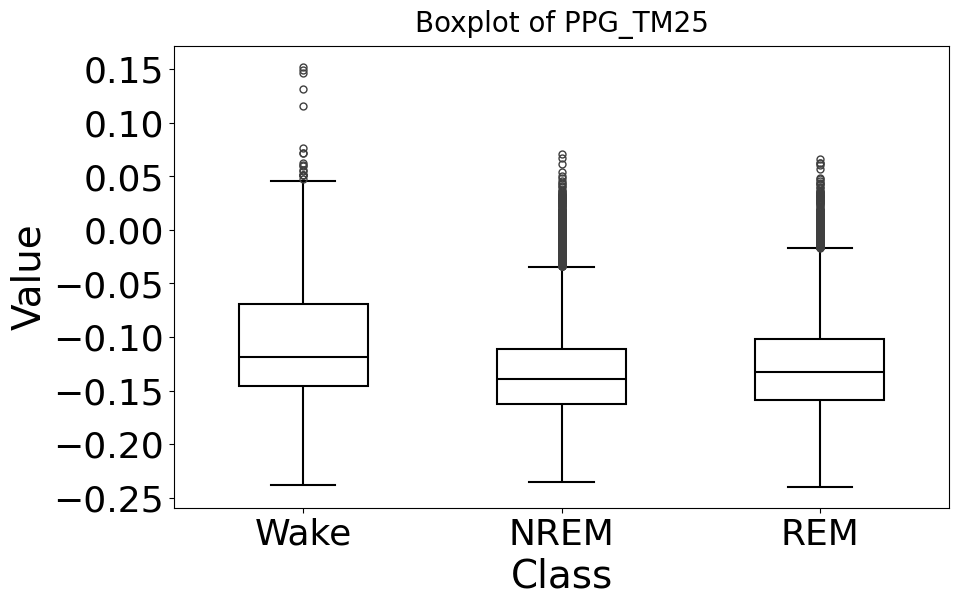

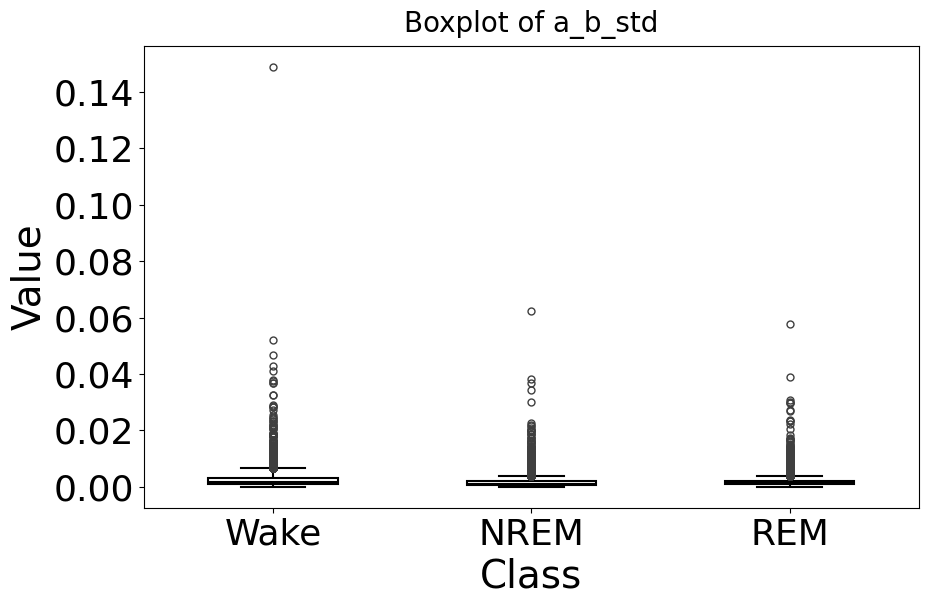

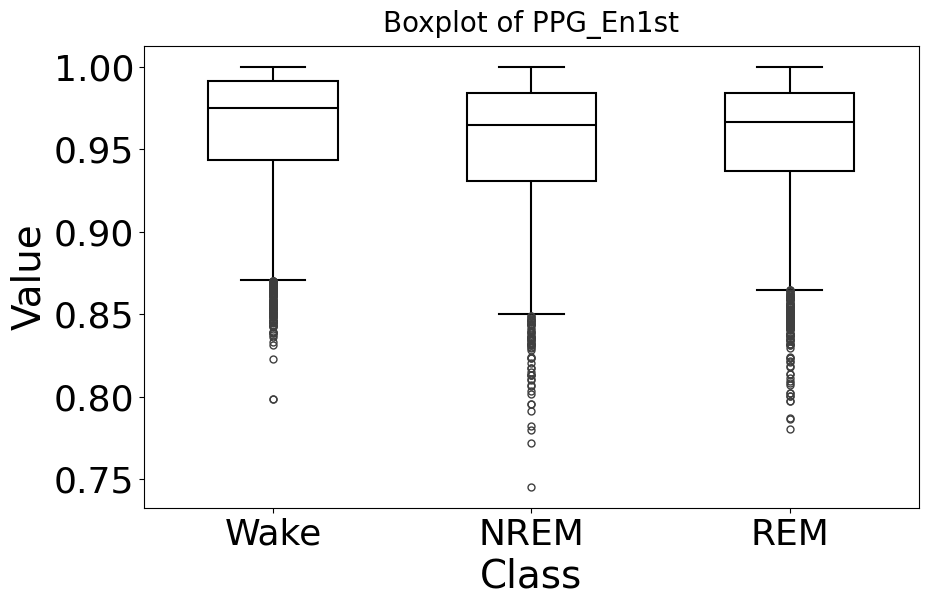

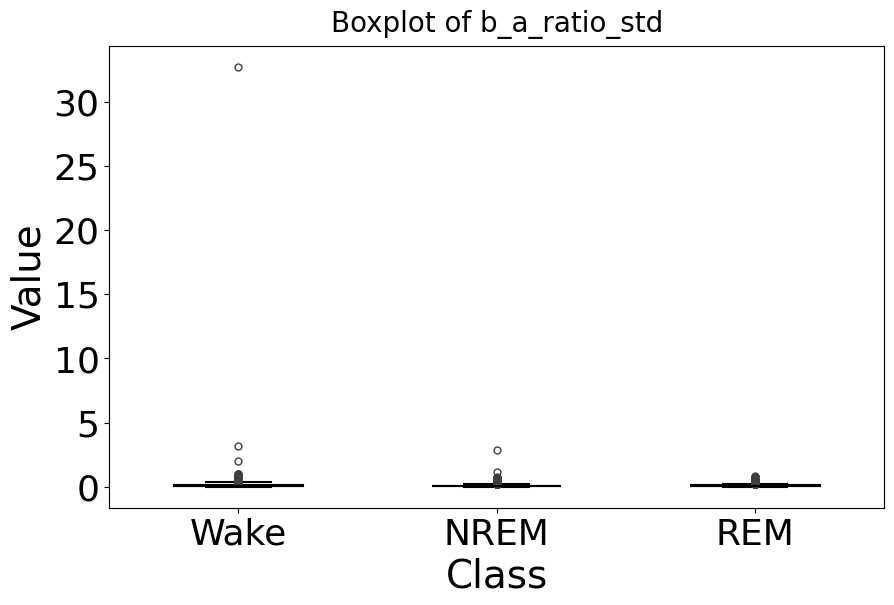

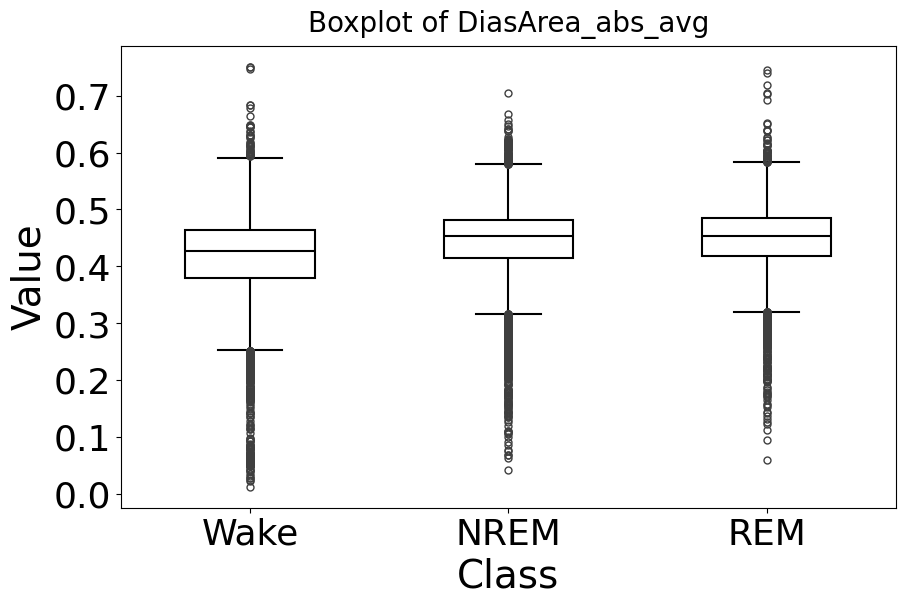

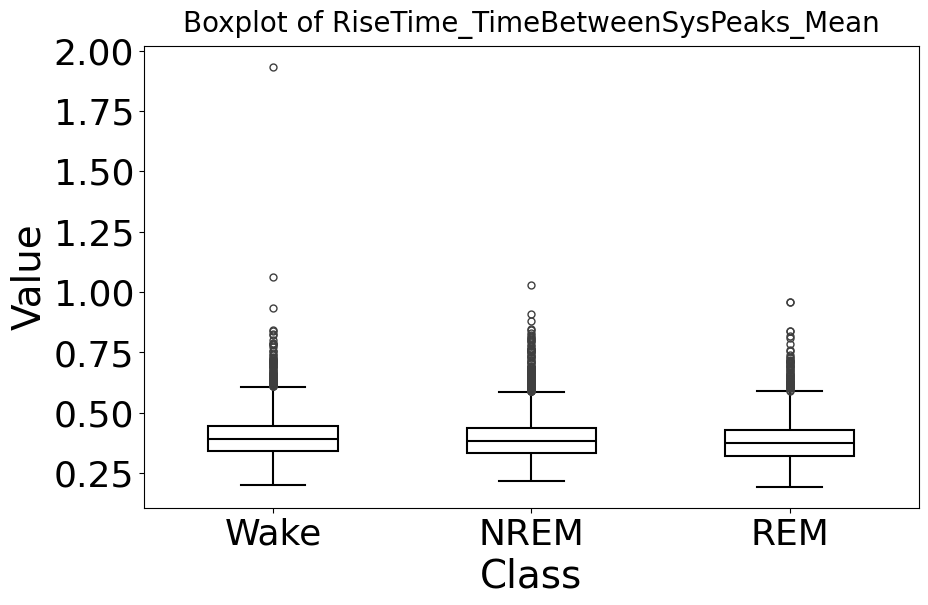

In [ ]:
# First, map your 'class' column to the desired string labels
# Create a dictionary to map the class values to sleep stages
class_mapping = {0: "Wake", 1: "NREM", 2: "REM"}

# Replace the numerical class labels in your DataFrame with the string labels
top_features['class'] = top_features['class'].map(class_mapping)

feature_names = top_features.drop(columns='class').columns  # assuming 'class' column exists

for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Create a boxplot
    sns.boxplot(x='class', y=feature, data=top_features,
                width=0.5,
                fliersize=5,
                linewidth=1.5,
                boxprops={'facecolor': 'white', 'edgecolor': 'black'},
                whiskerprops={'color': 'black'},
                capprops={'color': 'black'},
                medianprops={'color': 'black'})

    plt.title(f'Boxplot of {feature}', fontsize=20, pad = 10)
    plt.xlabel('Class', fontsize=28)
    plt.ylabel('Value', fontsize=28)

    # Set x-ticks labels according to the class labels
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)

    plt.show()


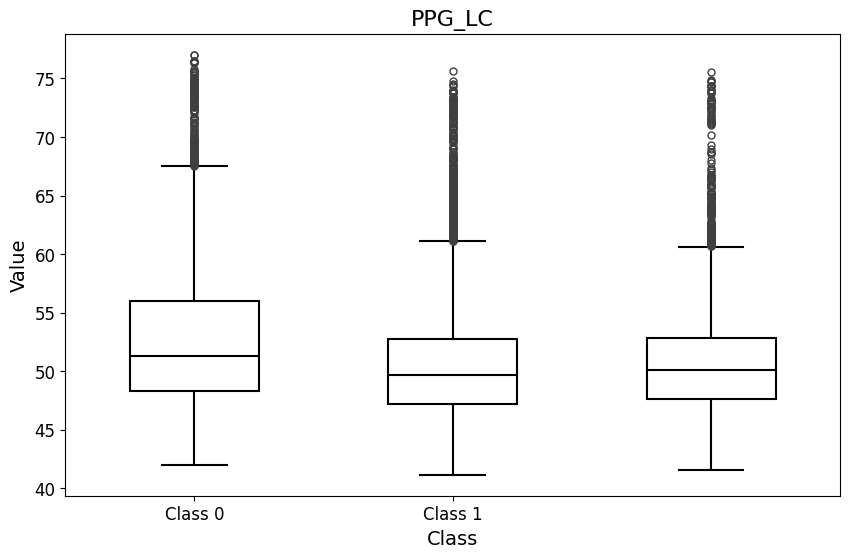

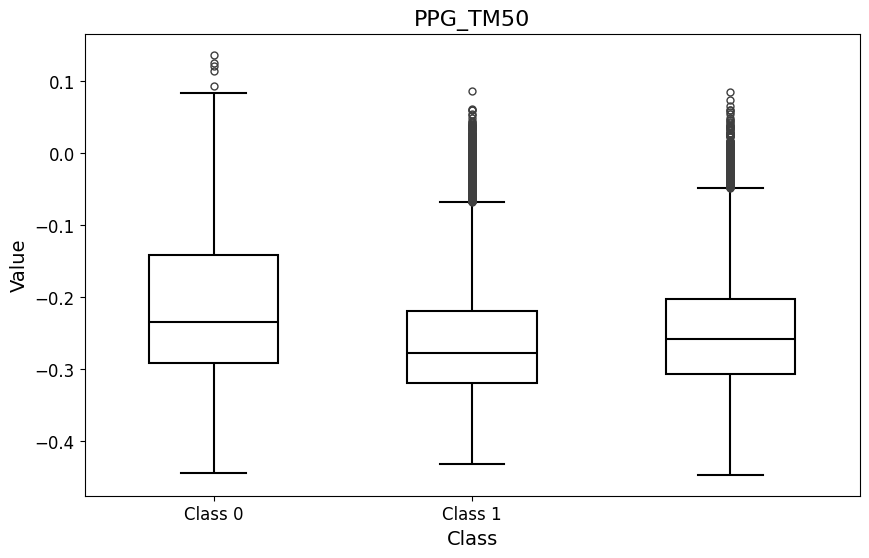

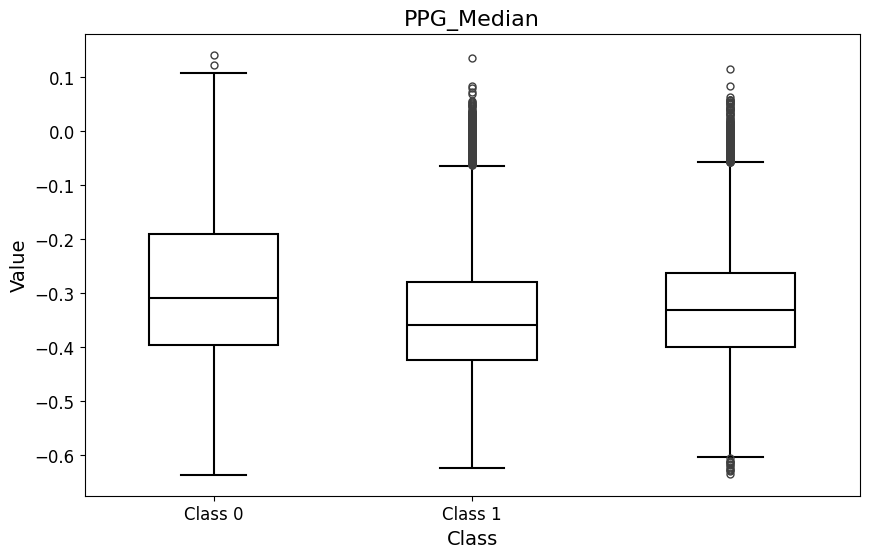

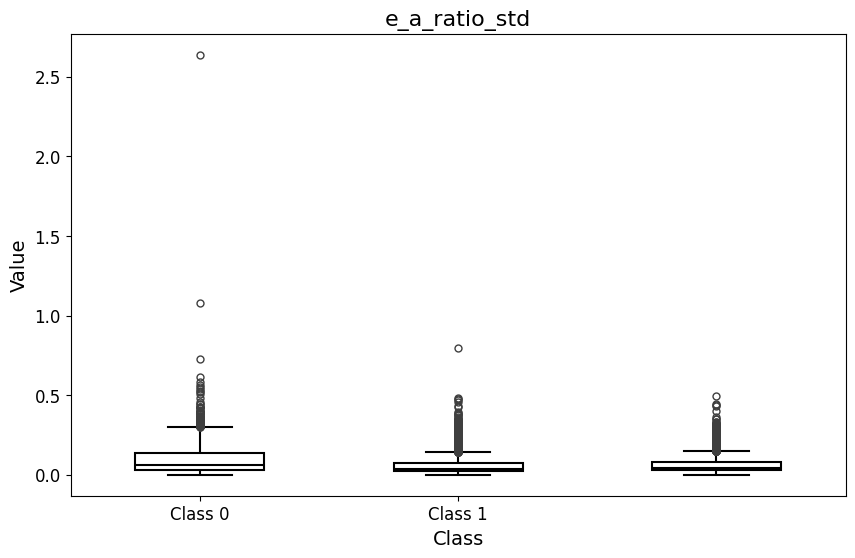

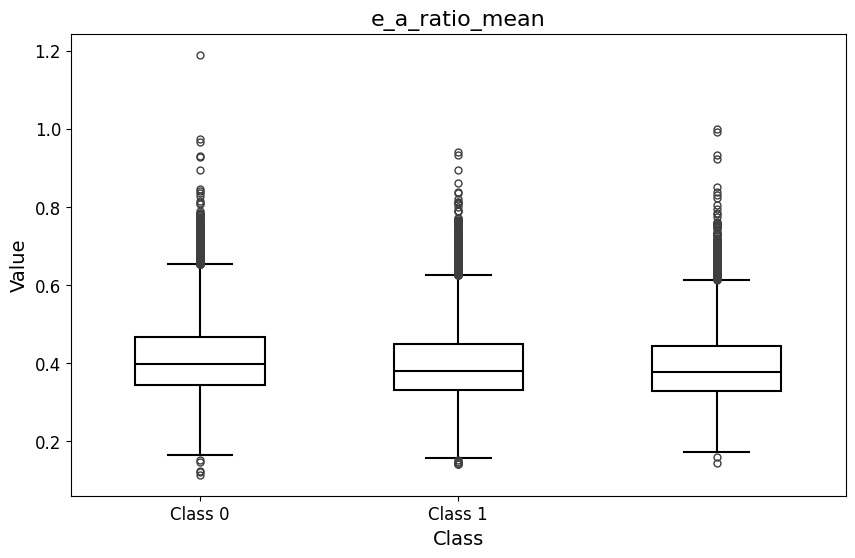

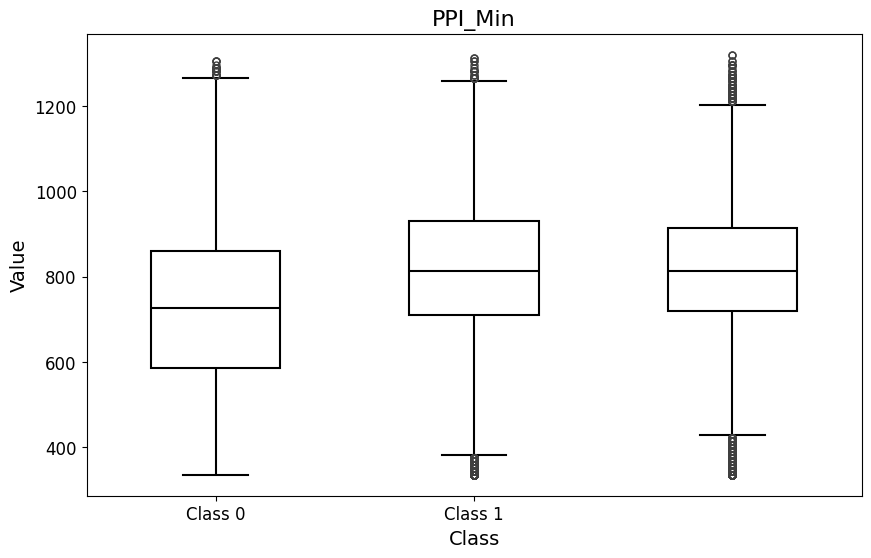

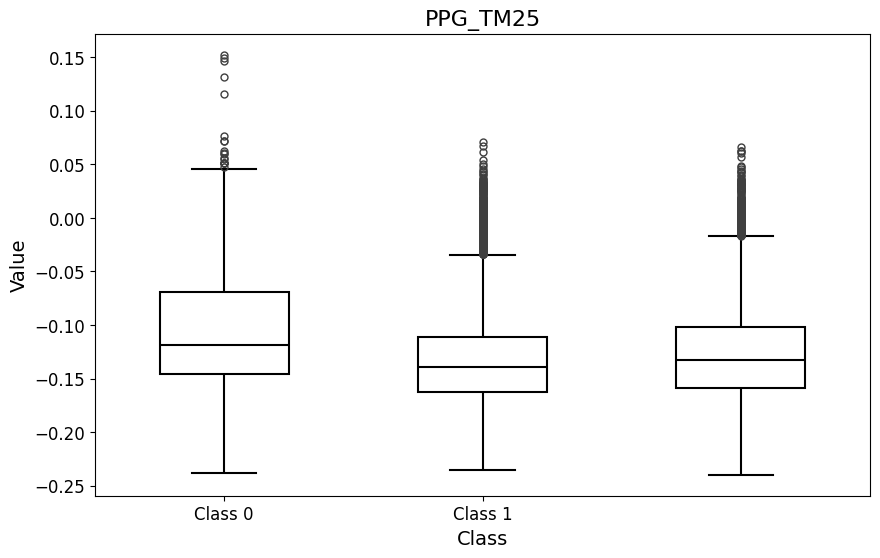

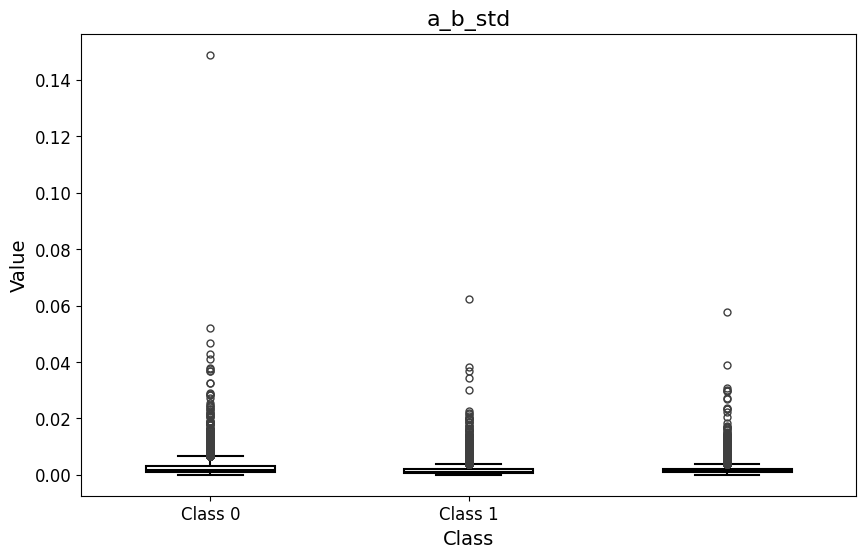

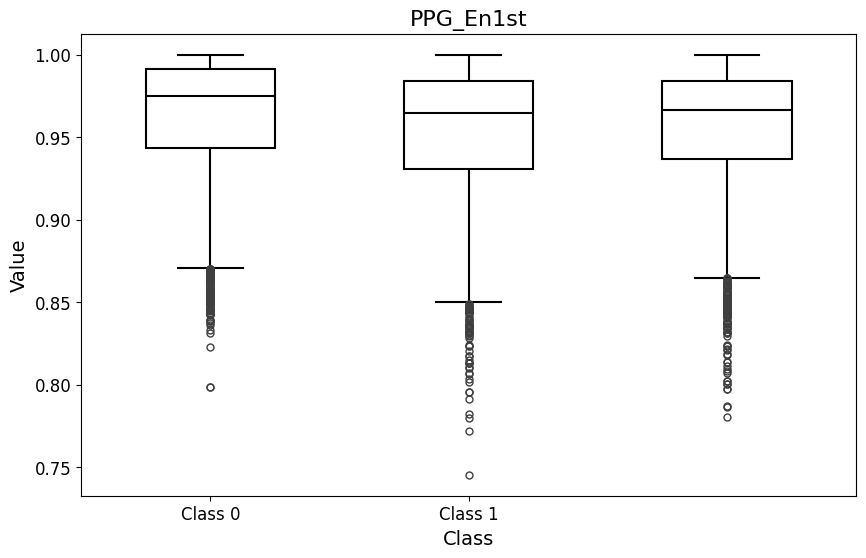

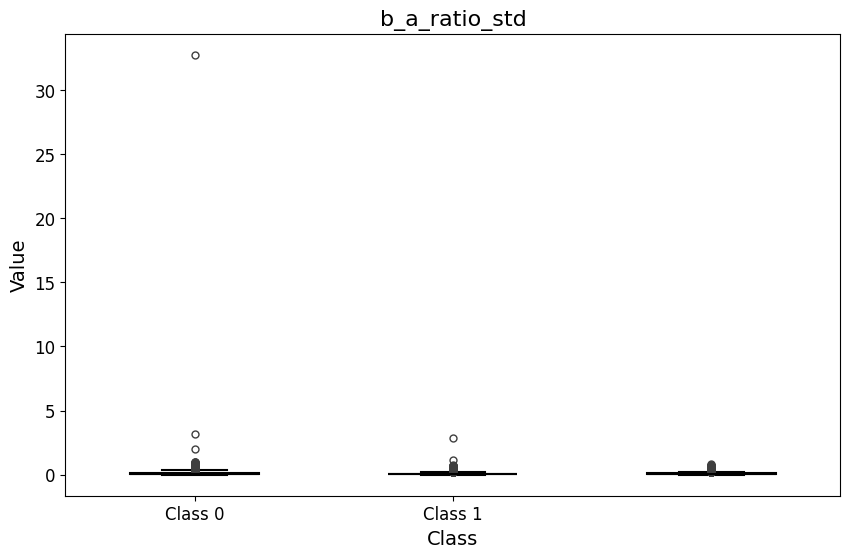

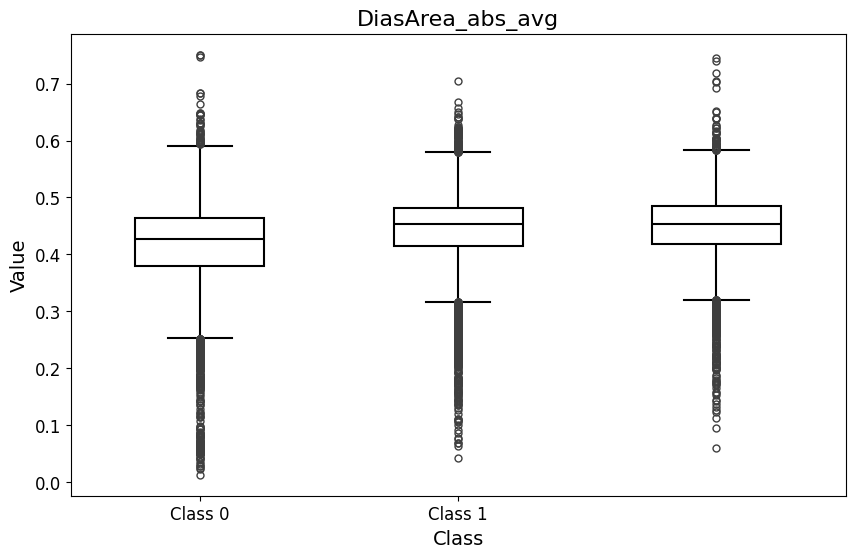

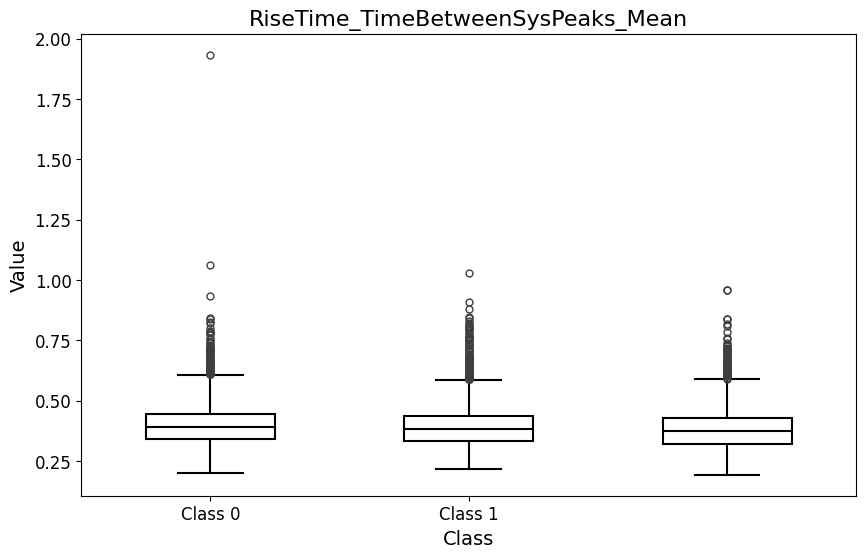

In [ ]:
for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Create a boxplot with correctly specified properties
    sns.boxplot(x='class', y=feature, data=top_features,
                width=0.5,  # Box width
                fliersize=5,  # Outlier marker size
                linewidth=1.5,  # Line width of the boxes
                boxprops={'facecolor': 'white', 'edgecolor': 'black'},  # Box fill and edge color
                whiskerprops={'color': 'black'},  # Whisker color
                capprops={'color': 'black'},  # Caps color
                medianprops={'color': 'black'})  # Median line color

    plt.title(f'{feature}', fontsize=16)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.xticks([0, 1], ['Class 0', 'Class 1'], fontsize=12)  # Adjust as needed
    plt.yticks(fontsize=12)

    plt.show()